# Bussiness Case :- 
### Based on the given datasets we need to predict confirmed cases/deaths and create a predictive model to forecast the Covid19 cases based on past cases for a specific Country/Region. And also make suggestions to the government health department of the country/region for preparation based on our prediction

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Fix a period for prediction of confirmed cases/deaths. Create a predictive model to forecast the Covid19 cases based on past cases for a specific country or region.

Task3:- Make suggestions to the government health department of the country/region for preparation based on your predictions.

In [1]:
## importing libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## load the datasets
Confirmed=pd.read_csv("time_series_covid19_confirmed_global.csv")
Death=pd.read_csv("time_series_covid19_deaths_global.csv")
Recovered=pd.read_csv("time_series_covid19_recovered_global.csv")

## Domain knowledge
***What is Coronavirus?***
- Coronavirus(CoV)are a large family of viruses that cause illness ranging from common cold to more severe diseases such as Middle East Respiratory Syndrome(MERS-CoV)and Severe Acute Respiratory Syndrme(SARS-CoV)
- Coronavirus are zoonotic, i.e. it can be transmitted between animals and human beings

***How Covid-19 emerged?***
- Covid-19 is the disease caused by the new coronavirus that emerged in China in December 2019.
- The source of coronavirus is believed to be a "wet market" in Wuhan which sold both dead and live animals including fish and birds.

***Symptoms of Coronavirus***
- Covid-19 symptoms include cough, fever, shortness of breath, dry cough, headache, sore throat, and pneumonia.
- Covid-19 can be severe, and some cases have caused death.


## Basic checks

In [3]:
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [4]:
Confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175


In [5]:
Death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,210,221,226,229,243,244,250,253,262,265
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,582,583,583,583,583,585,585,585,586,586
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,312,312,320,324,326,326,329,330,330,331


In [6]:
Recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,19979,20082,21406,21804,22209,23060,23333,23446,23700,24428
249,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1211,1212,1215,1219,1221,1221,1221,1221,1227,1235
251,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,12007,12260,12380,12590,12869,13029,13207,13365,13365,13629


In [7]:
Confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=248)

In [8]:
Death.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=248)

In [9]:
Recovered.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=248)

In [10]:
## Extracting all the columns using the keys() function
cols = Confirmed.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=248)

In [11]:
## extracting only the dates columns that have information of confirmed, death and recovered cases
confirmed=Confirmed.loc[:,cols[4]:cols[-1]]
death=Death.loc[:,cols[4]:cols[-1]]
recovered=Recovered.loc[:,cols[4]:cols[-1]]

In [12]:
confirmed.head(2)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,0,0,0,0,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,0,0,0,0,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535


## Data Preprocessing

In [13]:
## Finding the total confirmed cases, death cases and the rocovered cases and append thm to an 4 empty lists
## Also, calculate the total mortality rate which is the death_sum/confirmed cases
dates=confirmed.keys()
world_cases=[]
total_deaths=[]
mortality_rate=[]
total_recovered=[]
for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=death[i].sum()
    recovered_sum=recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [14]:
## Let's display each of the newly created variables
print('Total Confirmed cases:',confirmed_sum)
print('Total Death cases:',death_sum)
print('Total Recoveries:',recovered_sum)

Total Confirmed cases: 31245797
Total Death cases: 963693
Total Recoveries: 21394593


In [15]:
## Datewise total cases of all worlds
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9926,
 12038,
 16787,
 19887,
 23898,
 27643,
 30802,
 34395,
 37129,
 40159,
 42768,
 44810,
 45228,
 60381,
 66908,
 69050,
 71234,
 73269,
 75151,
 75651,
 76211,
 76840,
 78601,
 78981,
 79545,
 80398,
 81375,
 82735,
 84120,
 86013,
 88395,
 90372,
 92957,
 95272,
 98028,
 102018,
 106036,
 109993,
 113946,
 118967,
 126675,
 132450,
 146783,
 157801,
 169032,
 183677,
 199391,
 218683,
 245633,
 275963,
 307709,
 341784,
 384630,
 425787,
 476680,
 539069,
 603910,
 671653,
 731267,
 795997,
 872495,
 948663,
 1030010,
 1113203,
 1193711,
 1265377,
 1338067,
 1415186,
 1498895,
 1585483,
 1672988,
 1749872,
 1846819,
 1916464,
 1986284,
 2067245,
 2163941,
 2251672,
 2325485,
 2406054,
 2479522,
 2554727,
 2631781,
 2720583,
 2807495,
 2892296,
 2965076,
 3034072,
 3109425,
 3186589,
 3270117,
 3357276,
 3438689,
 3516333,
 3592506,
 3672660,
 3762727,
 3851894,
 3943470,
 4029169,
 4105292,
 4181640,
 4265367,
 4350206

### Reshape the Datasets
***Use the pd.melt function to convert each dataset from wide to long format.***

In [16]:
# Reshape comfirmed cases
Confirmed_melted=Confirmed.melt(id_vars=['Province/State',"Country/Region","Lat","Long"],var_name='Date',value_name="Confirmed")
# Reshape death cases
Death_melted=Death.melt(id_vars=['Province/State',"Country/Region","Lat","Long"],var_name='Date',value_name="Death")
# Reshape recovered cases
Recovered_melted=Recovered.melt(id_vars=['Province/State',"Country/Region","Lat","Long"],var_name='Date',value_name="Recovered")

### Merge the Datasets
***Merge the reshaped datasets on the columns Country, Lat, Long, and Date.***

In [17]:
## Merge confirmed and deaths
data=Confirmed_melted.merge(Death_melted,on=['Province/State',"Country/Region","Lat","Long",'Date'])
## Merge with recovered
data=data.merge(Recovered_melted,on=['Province/State',"Country/Region","Lat","Long",'Date'])

In [18]:
data.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered
60263,NaN,West Bank and Gaza,31.952200,35.233200,9/21/20,36151,265,24428
60264,NaN,Western Sahara,24.215500,-12.885800,9/21/20,10,1,8
60265,NaN,Yemen,15.552727,48.516388,9/21/20,2028,586,1235
60266,NaN,Zambia,-13.133897,27.849332,9/21/20,14175,331,13629
60267,NaN,Zimbabwe,-19.015438,29.154857,9/21/20,7683,225,5924


### Convert Date Column to Datetime Format
***Convert the Date column to datetime format for easier manipulation and analysis.***

In [19]:
## convert date to datetime format
data['Date']=pd.to_datetime(data['Date'],format='%m/%d/%y')

In [20]:
data.shape

(60268, 8)

### Verify the Merged Dataset

In [21]:
## Display the first 5 rows of the merged dataset
data.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0


## Preparation of the dataset

In [22]:
# Percentage of missing data in each column

number_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/number_of_columns
print(percentage_of_missing_data)

Province/State    0.736842
Country/Region    0.000000
Lat               0.000000
Long              0.000000
Date              0.000000
Confirmed         0.000000
Death             0.000000
Recovered         0.000000
dtype: float64


In [23]:
# fill missing values of 'Recovered' with 0
data['Recovered'] = data['Recovered'].fillna(0)

# fill missing values of 'province/state' with ''
data['Province/State'] = data['Province/State'].fillna('')

# convert values of 'Recovered' to int datatype
data['Recovered'] = data['Recovered'].astype('int')

# change names of some countries
data['Country/Region'] = data['Country/Region'].replace('Korea, South', "South Korea")
data['Country/Region'] = data['Country/Region'].replace('Mainland China', 'China')
data['Country/Region'] = data['Country/Region'].replace('Taiwan*', 'Taiwan')
data['Country/Region'] = data['Country/Region'].replace('Congo (Kinshasa)', 'Democratic Republic of the Congo')
data['Country/Region'] = data['Country/Region'].replace('Congo (Brazzaville)', 'Republic of the Congo')
data.loc[data['Province/State']=='Greenland', 'Country/Region'] = 'Greenland'

# define new feature for main_df
data['Active'] = data['Confirmed'] - data['Death'] - data['Recovered']

data.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered,Active
60263,,West Bank and Gaza,31.952200,35.233200,2020-09-21,36151,265,24428,11458
60264,,Western Sahara,24.215500,-12.885800,2020-09-21,10,1,8,1
60265,,Yemen,15.552727,48.516388,2020-09-21,2028,586,1235,207
60266,,Zambia,-13.133897,27.849332,2020-09-21,14175,331,13629,215
60267,,Zimbabwe,-19.015438,29.154857,2020-09-21,7683,225,5924,1534


**A dataset by filling missing values in the 'Recovered' and 'province/state' columns, converting 'Recovered' to integers, standardizing country names, and calculating the 'Active' cases. The displayed data shows the last few rows with columns including 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Death', 'Recovered', and 'Active'.**

## Group covid19_full_cleaned dataframe by 'Date' and 'Country/Region'

In [24]:
covid19_date_country = data.groupby(['Date', 'Country/Region'])[['Confirmed', 'Death', 'Recovered', 'Active']].sum().reset_index()

# add new columns containing new confirmed, new deaths and new recovered for each day
new_col = covid19_date_country.groupby(['Country/Region', 'Date'])[['Confirmed', 'Death', 'Recovered']].sum()\
                                    .diff().reset_index()
# rename some columns of new_col
new_col.columns = ['Country/Region', 'Date', 'New confirmed', 'New deaths', 'New recovered']
columns = ['New confirmed', 'New deaths', 'New recovered']

# fix the value of first row of each country
first_rows = (new_col['Country/Region'] != new_col['Country/Region'].shift(1))
new_col.loc[first_rows, 'New confirmed'] = 0
new_col.loc[first_rows, 'New deaths'] = 0
new_col.loc[first_rows, 'New recovered'] = 0

# merging new values
covid19_date_country = pd.merge(covid19_date_country, new_col, on=['Country/Region', 'Date'])

# fill missing values with 0
covid19_date_country = covid19_date_country.fillna(0)

covid19_date_country['New confirmed'] = covid19_date_country['New confirmed'].apply(lambda x: 0 if x<0 else x)

# fix datatypes of new columns
covid19_date_country[columns] = covid19_date_country[columns].astype('int')



covid19_date_country.tail()



,Date,Country/Region,Confirmed,Death,Recovered,Active,New confirmed,New deaths,New recovered
45135,2020-09-21,West Bank and Gaza,36151,265,24428,11458,465,3,728
45136,2020-09-21,Western Sahara,10,1,8,1,0,0,0
45137,2020-09-21,Yemen,2028,586,1235,207,2,0,8
45138,2020-09-21,Zambia,14175,331,13629,215,44,1,264
45139,2020-09-21,Zimbabwe,7683,225,5924,1534,0,0,0


## Dataframe with the latest values of 'Country_Region'

In [25]:
# get the latest values related to each country
covid19_country_latest = covid19_date_country[covid19_date_country['Date']==max(covid19_date_country['Date'])].reset_index(drop=True)\
                    .drop('Date', axis=1)

print(covid19_country_latest.shape)
print(covid19_country_latest['Country/Region'].unique().shape)

# mortality and recovery rates
covid19_country_latest['Recovery rate(per 100)'] = \
                np.round(100*covid19_country_latest['Recovered']/covid19_country_latest['Confirmed'],2)
covid19_country_latest['Mortality rate(per 100)'] = \
                np.round(100*covid19_country_latest['Death']/covid19_country_latest['Confirmed'],2)

# fill missing values with 0
columns = ['Recovery rate(per 100)', 'Mortality rate(per 100)']
covid19_country_latest[columns] = covid19_country_latest[columns].fillna(0)


covid19_country_latest.head()

(185, 8)
(185,)


,Country/Region,Confirmed,Death,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100)
0,Afghanistan,39074,1444,32576,5054,30,3,0,83.37,3.70
1,Albania,12535,364,6995,5176,150,2,55,55.80,2.90
2,Algeria,50023,1679,35180,13164,197,7,133,70.33,3.36
3,Andorra,1681,53,1199,429,117,0,35,71.33,3.15
4,Angola,4117,154,1449,2514,126,2,4,35.20,3.74


In [26]:
# For visualization with the latest data of 21th of september
dates=Confirmed.keys()
latest_confirmed = Confirmed[dates[-1]]
latest_deaths = Death[dates[-1]]
latest_recoveries = Recovered[dates[-1]]

In [27]:
latest_confirmed

0      39074
1      12535
2      50023
3       1681
4       4117
       ...  
261    36151
262       10
263     2028
264    14175
265     7683
Name: 9/21/20, Length: 266, dtype: int64

In [28]:
latest_deaths

0      1444
1       364
2      1679
3        53
4       154
       ... 
261     265
262       1
263     586
264     331
265     225
Name: 9/21/20, Length: 266, dtype: int64

In [29]:
latest_recoveries

0      32576
1       6995
2      35180
3       1199
4       1449
       ...  
248    24428
249        8
250     1235
251    13629
252     5924
Name: 9/21/20, Length: 253, dtype: int64

In [30]:
# Find the list of unique countries

unique_countries =  list(Confirmed['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [31]:
# The next line of code will basically calculate the total number of confirmed cases by each country
import operator
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[Confirmed['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[Confirmed['Country/Region']==unique_countries[i]].sum()

In [32]:
# number of cases per country/region

print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 6856884 cases
India: 5487580 cases
Brazil: 4558040 cases
Russia: 1105048 cases
Colombia: 770435 cases
Peru: 768895 cases
Mexico: 700580 cases
Spain: 671468 cases
South Africa: 661936 cases
Argentina: 640147 cases
France: 496851 cases
Chile: 447468 cases
Iran: 425481 cases
United Kingdom: 401122 cases
Bangladesh: 350621 cases
Saudi Arabia: 330246 cases
Iraq: 322856 cases
Pakistan: 306886 cases
Turkey: 304610 cases
Italy: 299506 cases
Philippines: 290190 cases
Germany: 275560 cases
Indonesia: 248852 cases
Israel: 190929 cases
Ukraine: 182900 cases
Canada: 147583 cases
Bolivia: 130986 cases
Ecuador: 126711 cases
Qatar: 123604 cases
Romania: 113589 cases
Dominican Republic: 108783 cases
Kazakhstan: 107374 cases
Panama: 106810 cases
Belgium: 103392 cases
Morocco: 103119 cases
Egypt: 102141 cases
Netherlands: 100491 cases
Kuwait: 99964 cases
Oman: 94051 cases
China: 90381 cases
Sweden: 88237 cases
Guatemala: 85681 cases
United Arab Emirates: 85595 ca

## Data Viualizatio (EDA)

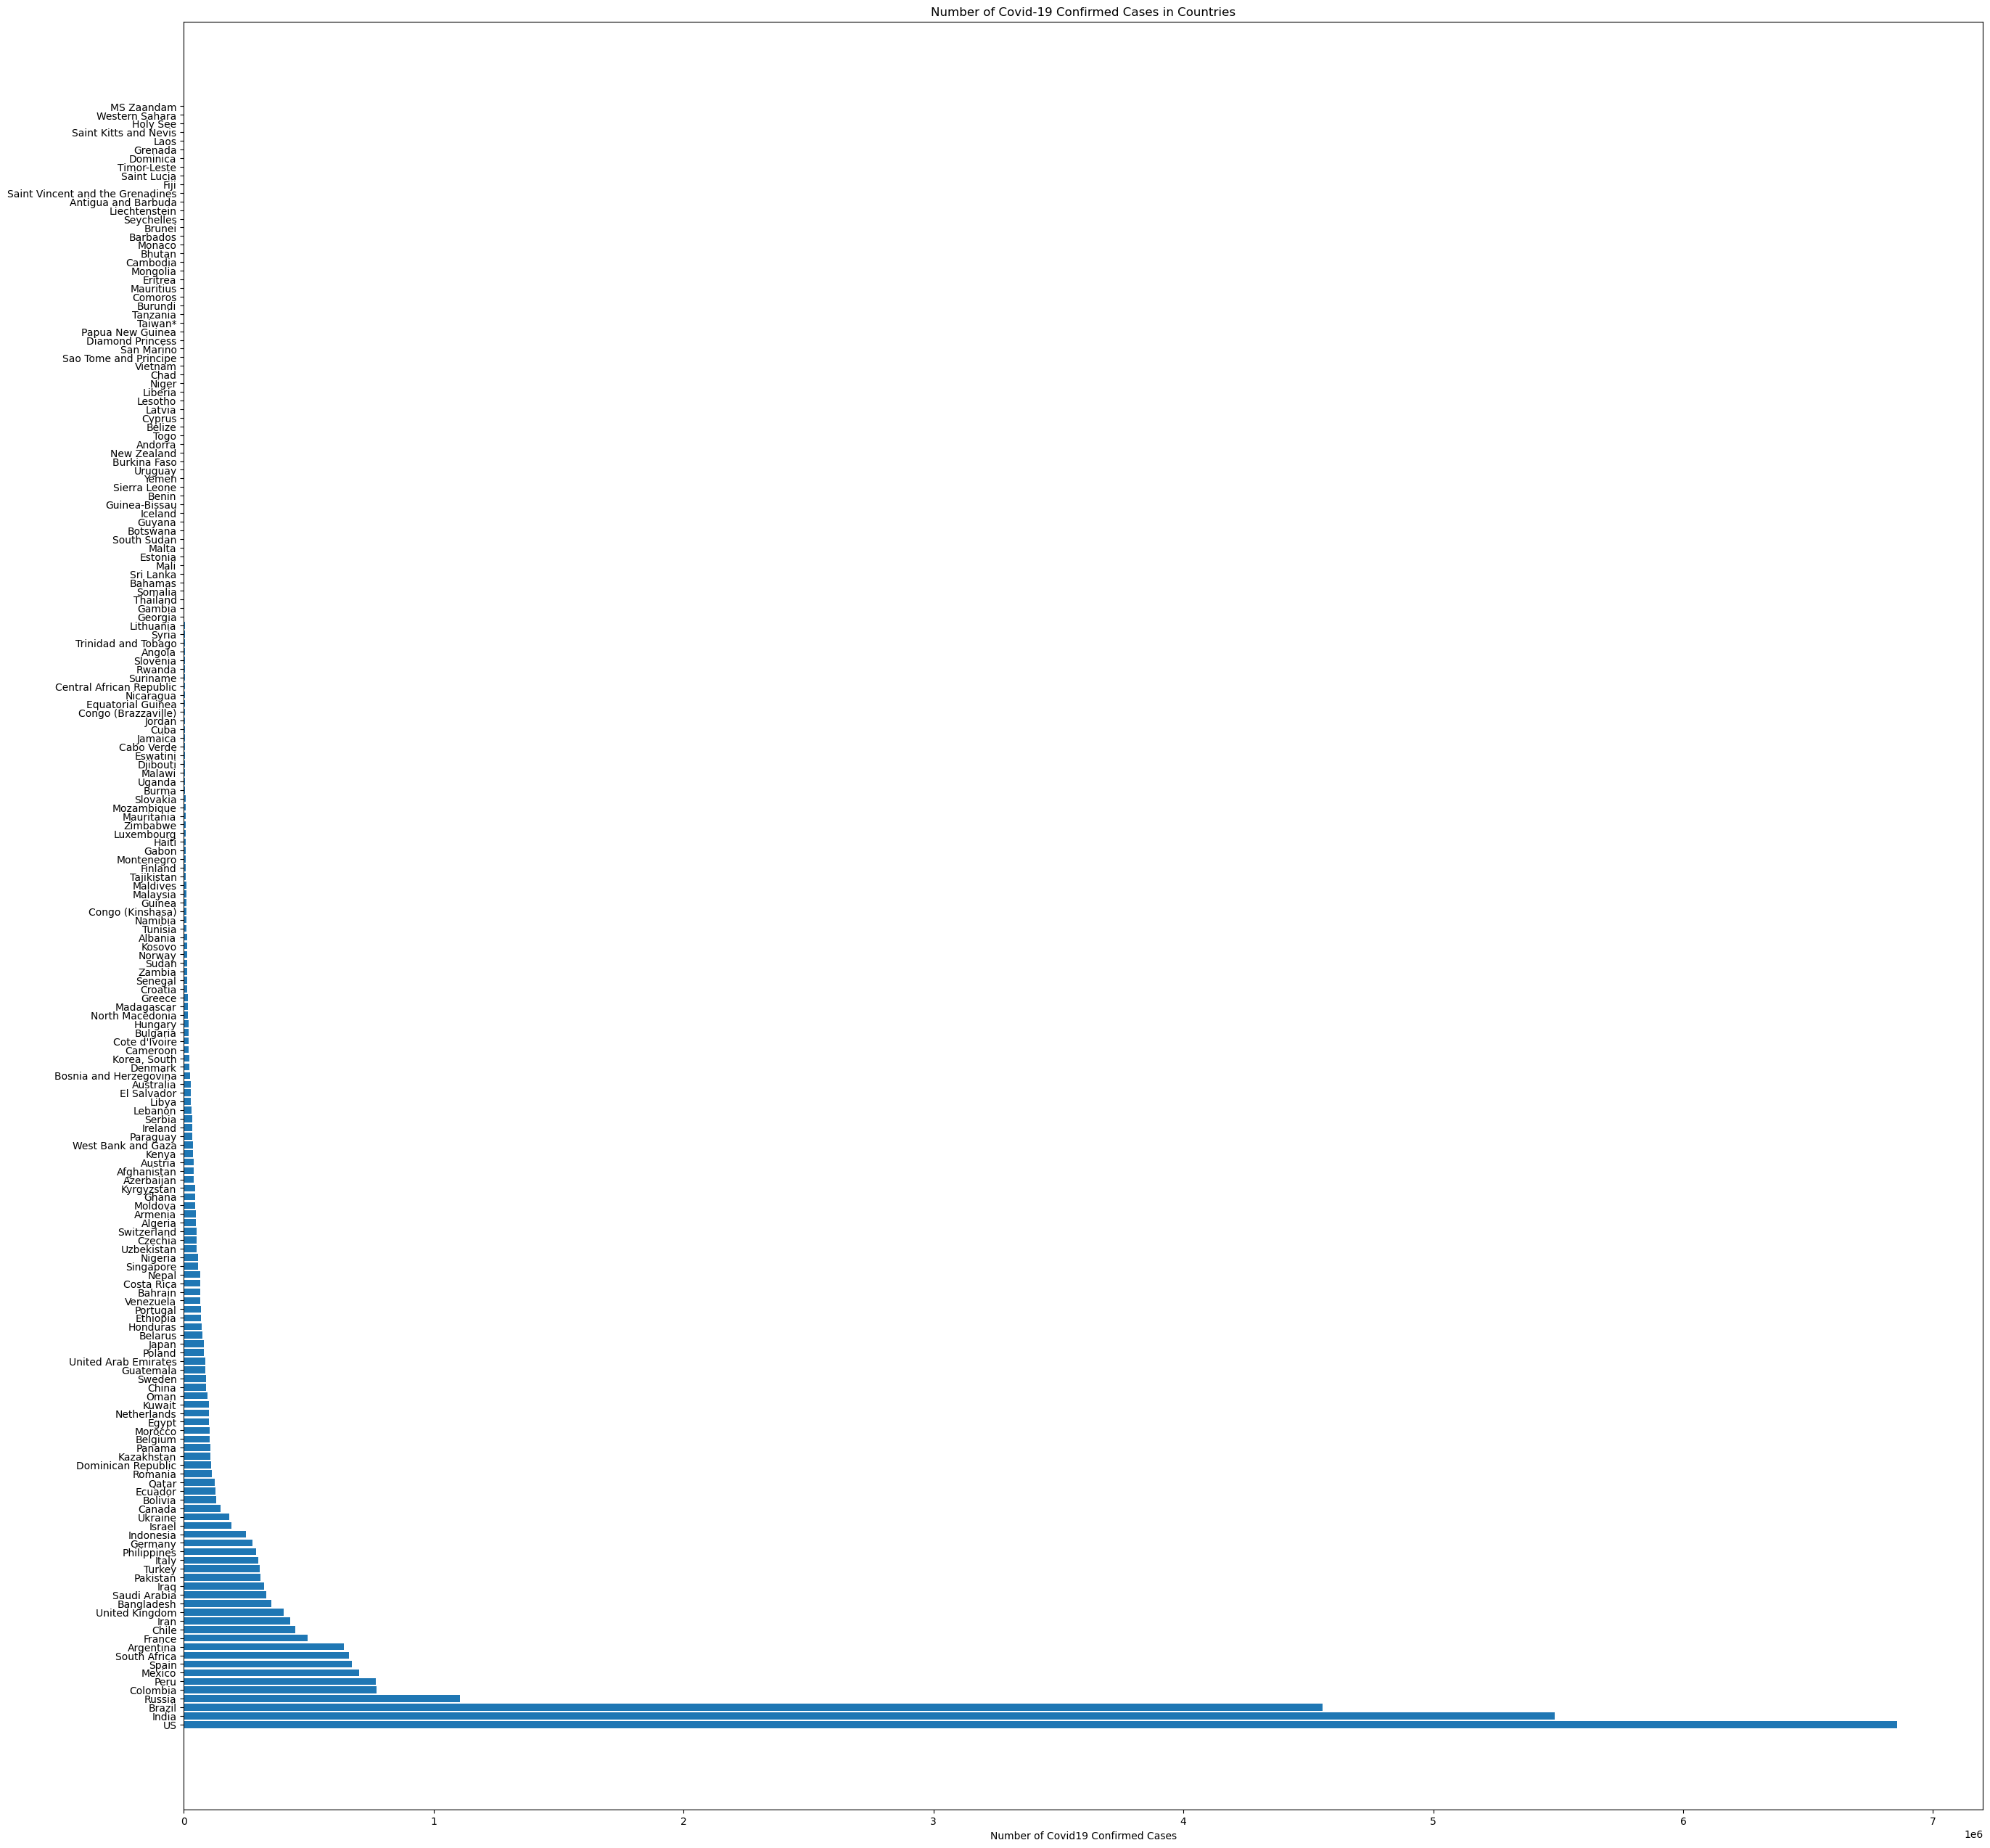

In [33]:
# Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()


## Group Covid 19_day_country dataframe by 'Date'

In [34]:
covid19_world = covid19_date_country.groupby('Date')[['Confirmed', 'Death', 'Recovered','Active', 'New confirmed', 'New deaths',
                                                'New recovered']].sum().reset_index()

# mortality and recovery rates

covid19_world['Recovery rate(per 100)'] = \
                np.round(100*covid19_world['Recovered']/covid19_world['Confirmed'],2)
covid19_world['Mortality rate(per 100)'] = \
                np.round(100*covid19_world['Death']/covid19_world['Confirmed'],2)

 #Number of countries having non-zero confirmed cases in each date
covid19_world['Number of countries'] = covid19_date_country[covid19_date_country['Confirmed']!=0].groupby('Date')\
['Country/Region'].unique().apply(len).values

# fill missing values with 0
columns = ['Recovery rate(per 100)', 'Mortality rate(per 100)']
covid19_world[columns] = covid19_world[columns].fillna(0)

covid19_world.head()

,Date,Confirmed,Death,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),Number of countries
0,2020-01-22,549,17,28,504,0,0,0,5.10,3.10,6
1,2020-01-23,648,17,30,601,99,0,2,4.63,2.62,8
2,2020-01-24,930,25,36,869,282,8,6,3.87,2.69,9
3,2020-01-25,1394,41,39,1314,464,16,3,2.80,2.94,11
4,2020-01-26,2021,54,52,1915,627,13,13,2.57,2.67,12


## Data visulization

## The latest global status

In [35]:
covid19_world['Date'] = pd.to_datetime(covid19_world['Date'])

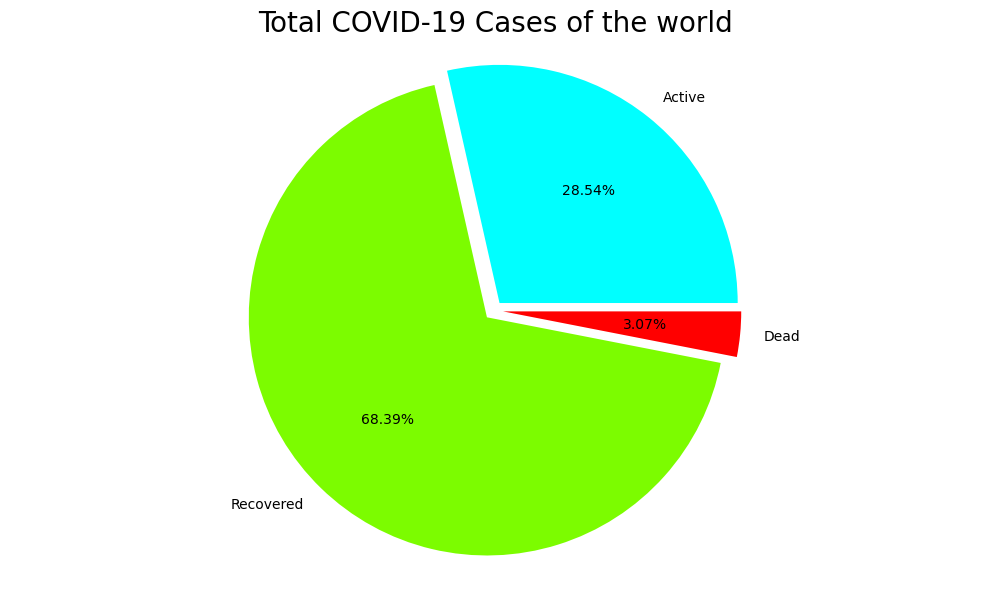

In [36]:
last_day = covid19_world.shape[0]-1
labels = ['Active','Recovered','Dead']
sizes = [covid19_world['Active'][last_day],covid19_world['Recovered'][last_day],covid19_world['Death'][last_day]]

plt.figure(figsize= (10,6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=0, explode =[0.04,0.04,0.04],
        colors = ['cyan','lawngreen','red'])
#centre_circle = plt.Circle((0,0),0.4,fc='white')

fig = plt.gcf()
#fig.gca().add_artist(centre_circle)
plt.title('Total COVID-19 Cases of the world',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

**1)Purpose:** Creates a pie chart to display the proportion of active, recovered, and death cases globally.

**2)Outcome:** Provides a clear visual representation of the distribution of COVID-19 cases as of the latest date in the dataset.

**3)Summary of the Latest Global Status:**
**Purpose:** Extracts the most recent data for confirmed, recovered, death, active cases, recovery and mortality rates, and the number of affected countries. Formats it for display.

In [37]:
# total status of the COVID-19 Cases of the world

date_df2 = covid19_world[['Confirmed', 'Recovered', 'Death','Active','Recovery rate(per 100)',
                         'Mortality rate(per 100)','Number of countries']].tail(1)

date_df2.style.background_gradient(cmap='autumn_r',axis=1).format("{:.2f}").format("{:.2f}")

,Confirmed,Recovered,Death,Active,Recovery rate(per 100),Mortality rate(per 100),Number of countries
243,31085798.00,21260570.00,954167.00,8871061.00,68.39,3.07,185.00


## Confirmed, Active, Recovered and Death cases in 10 Most-affected Countries

In [38]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

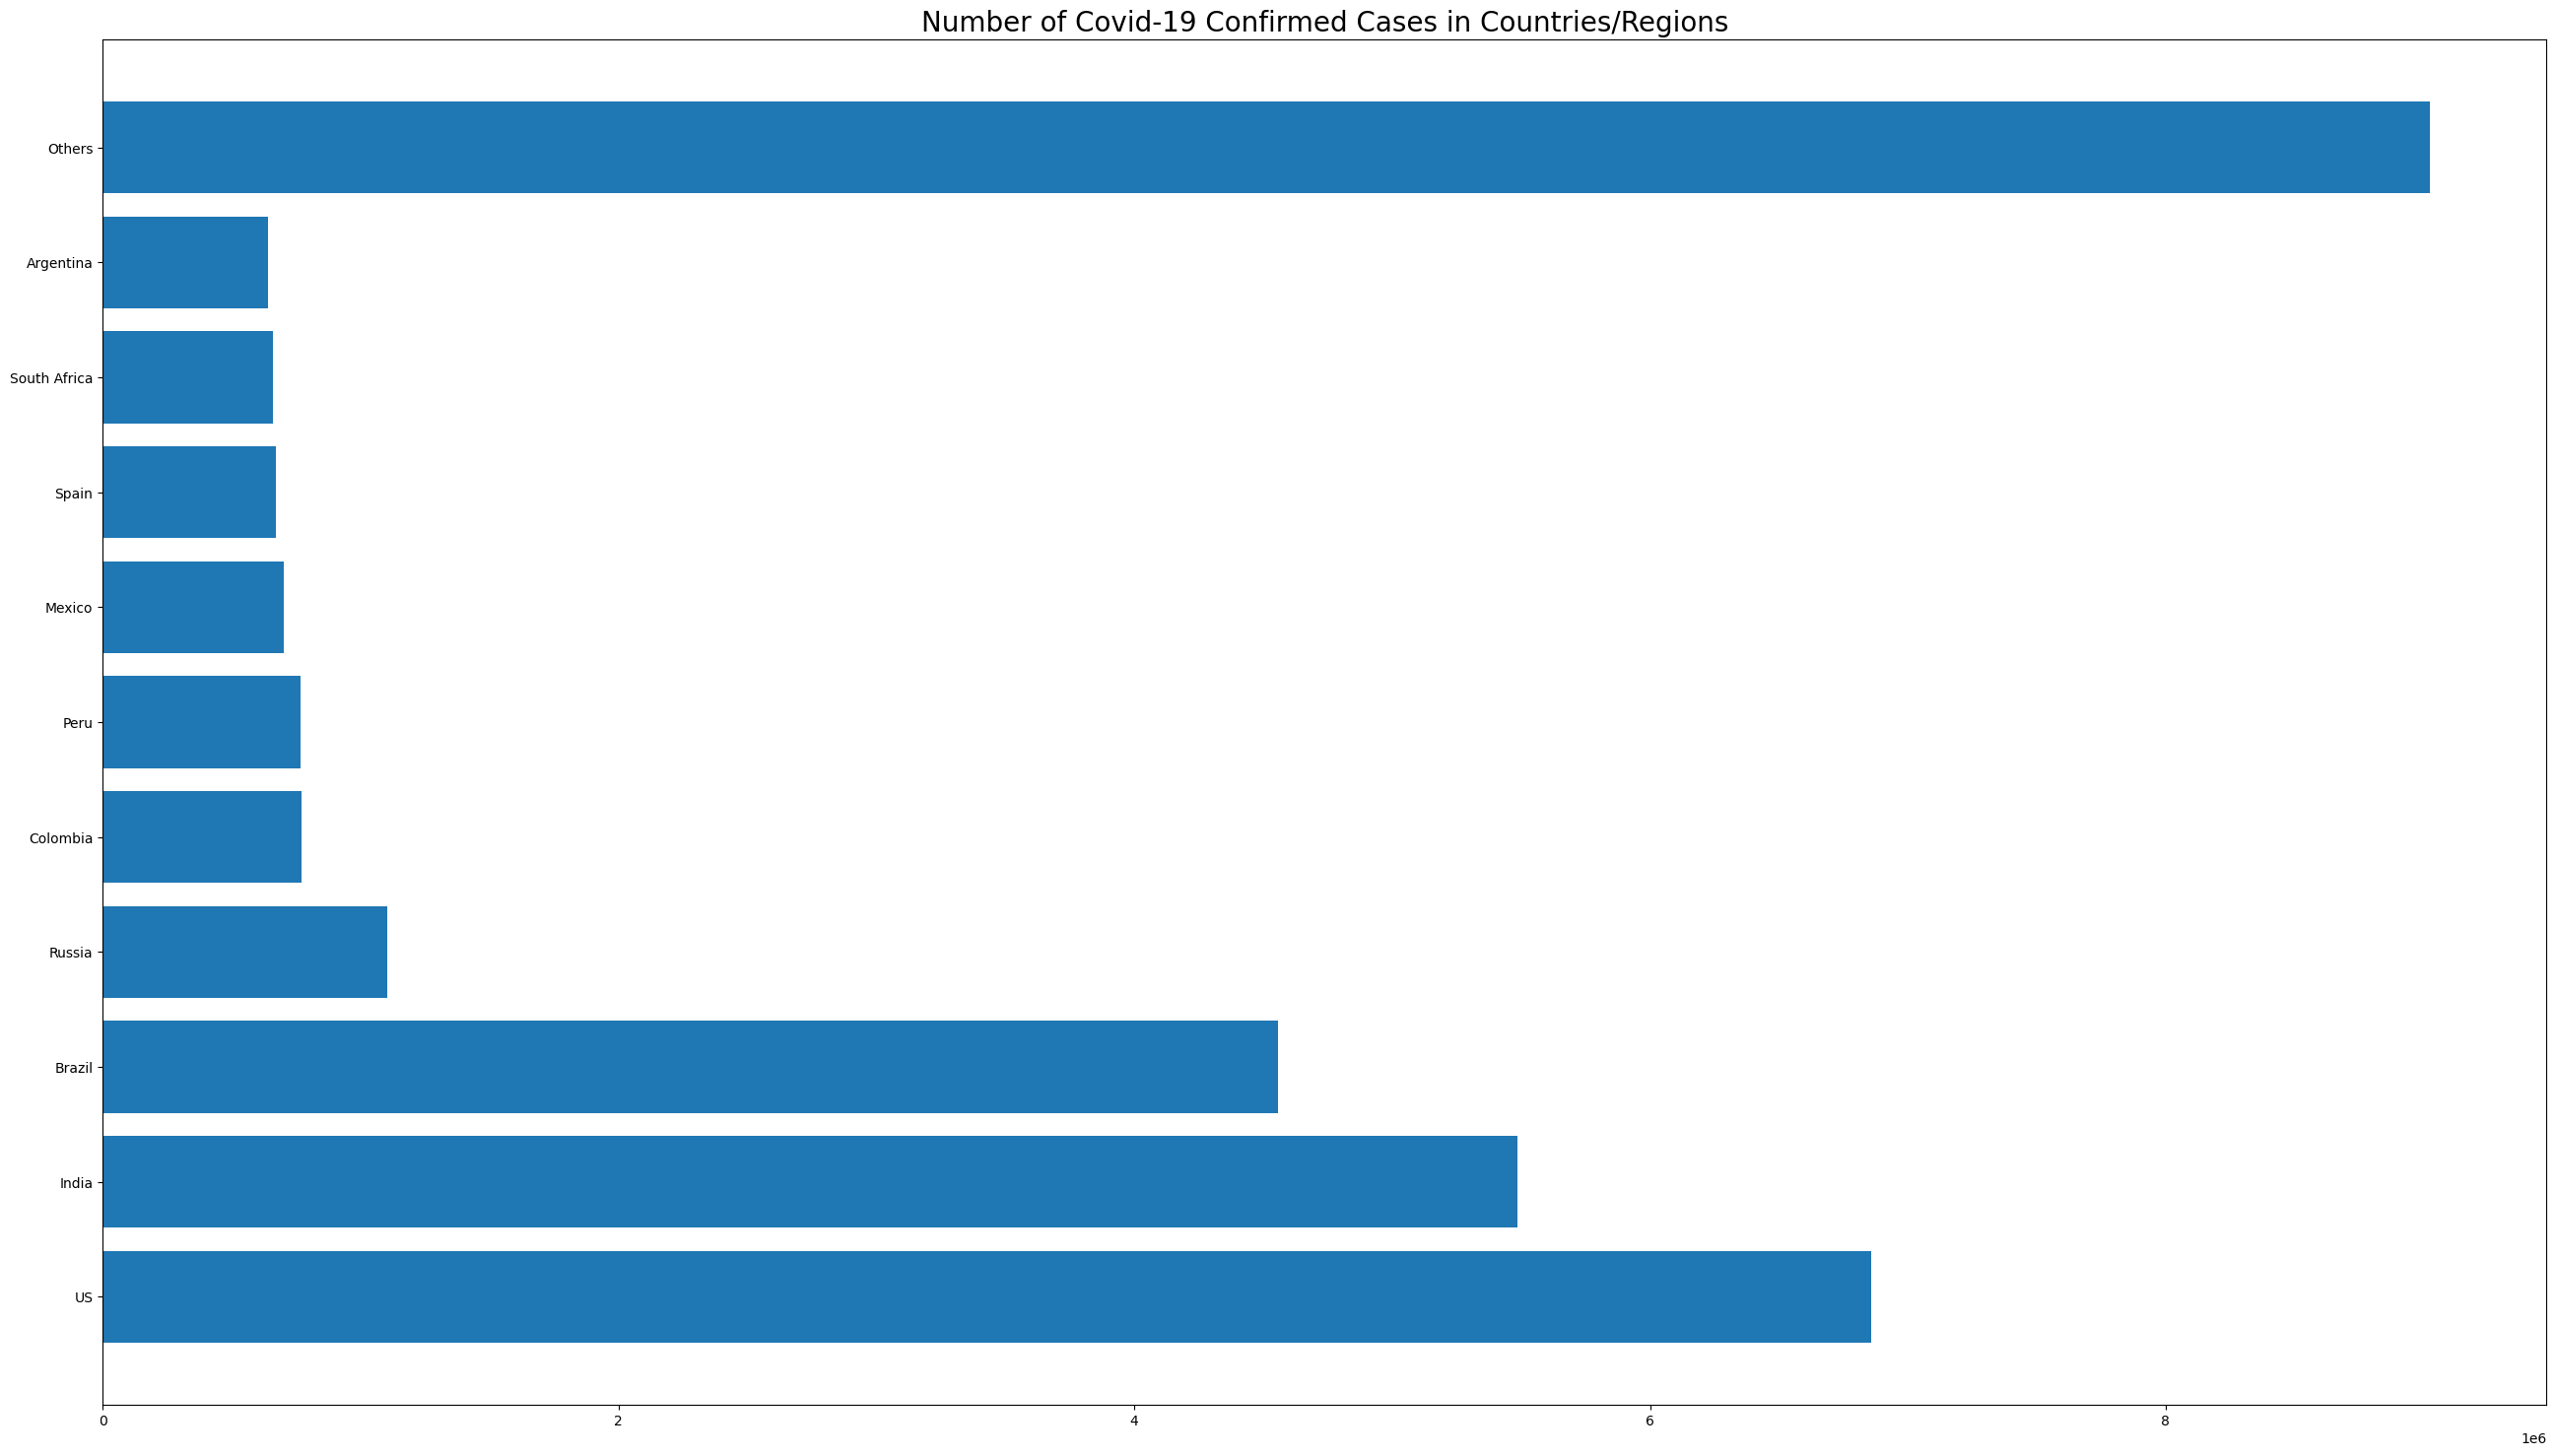

In [39]:
# Visualize the 10 countries

plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

**Purpose**: Aggregates and visualizes the number of confirmed cases in the 10 most-affected countries, with the rest grouped into an “Others” category.
**Outcome**: Provides a horizontal bar chart for easy comparison of the impact in the most-affected countries.

In [40]:
import matplotlib.dates as mdates

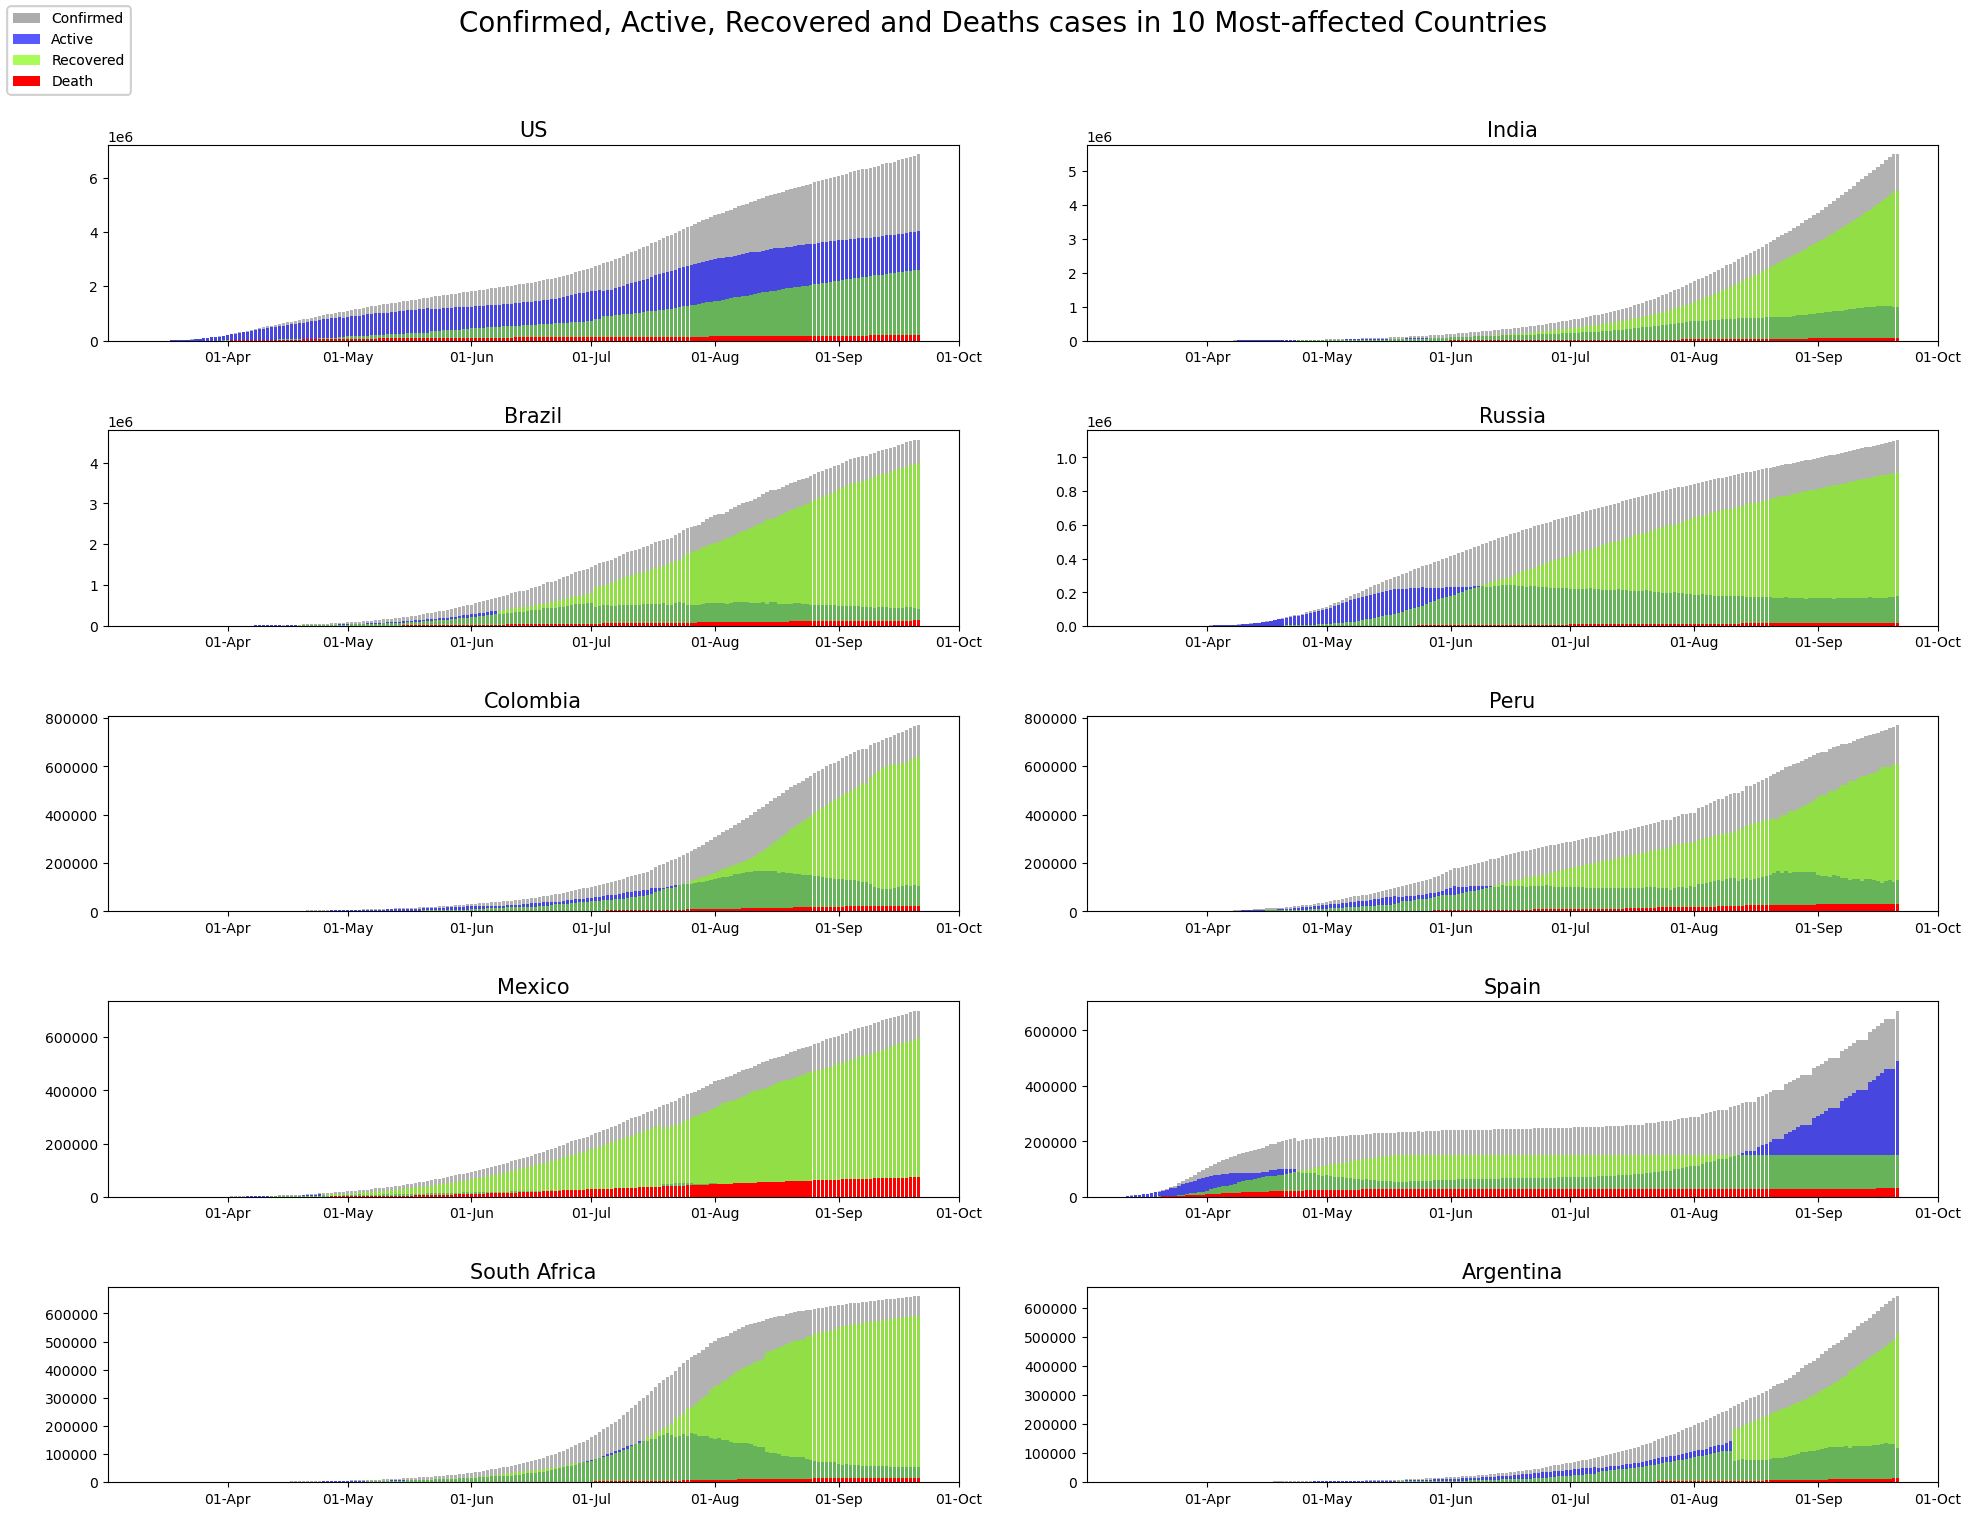

In [41]:
dates = covid19_world['Date'][50:]

# 10 most-affected countries to date 
most_affected=['US','India','Brazil','Russia','Colombia','Peru', 'Mexico','Spain', 'South Africa','Argentina']

def country_df(i):
    df=covid19_date_country[covid19_date_country['Country/Region'] == most_affected[i]].iloc[50:,:]
    return df

fig = plt.figure(figsize= (20,18))
plt.suptitle('Confirmed, Active, Recovered and Deaths cases in 10 Most-affected Countries', fontsize = 20, y = 1.0)
k=0
for i in range(1,11):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(dates,country_df(k)['Confirmed'].values,color = 'grey',alpha = 0.6,label = 'Confirmed');
    ax.bar(dates,country_df(k)['Active'].values,color = 'blue',alpha = 0.6,label = 'Active');
    ax.bar(dates,country_df(k)['Recovered'].values,color='lawngreen',alpha = 0.6,label = 'Recovered');
    ax.bar(dates,country_df(k)['Death'].values,color='red',label = 'Death');   
    plt.title(most_affected[k], fontsize = 15)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)

### The graph for the US in the top-left subplot shows the cumulative counts of confirmed, active, recovered, and death cases of COVID-19 over time. The confirmed cases (in grey) steadily increase, reaching over 6 million by early October. The active cases (in blue) peak and then slightly decrease, indicating some recovery over time. The recovered cases (in green) grow significantly, surpassing 4 million, while the death cases (in red) remain comparatively low but still increase steadily, highlighting the ongoing impact of the pandemic.

## Comparing Covid-19 case status of 10 most affected countries

In [42]:
def compare_plt(col):
    plt.figure(figsize= (20,10))
    plt.xticks(rotation = 60 ,fontsize = 11)
    plt.yticks(fontsize = 10)
    plt.xlabel("Dates",fontsize = 20)
    plt.ylabel('%s cases' % (col),fontsize = 20)
    plt.title("Covid-19 %s Cases of 10 Most Affected Countries" % (col), fontsize = 20)

    for i in range(len(most_affected)):
        plt.plot_date(y= country_df(i)[col].values,x= dates,label = most_affected[i],alpha=0.6,linestyle ='-')
    plt.legend();

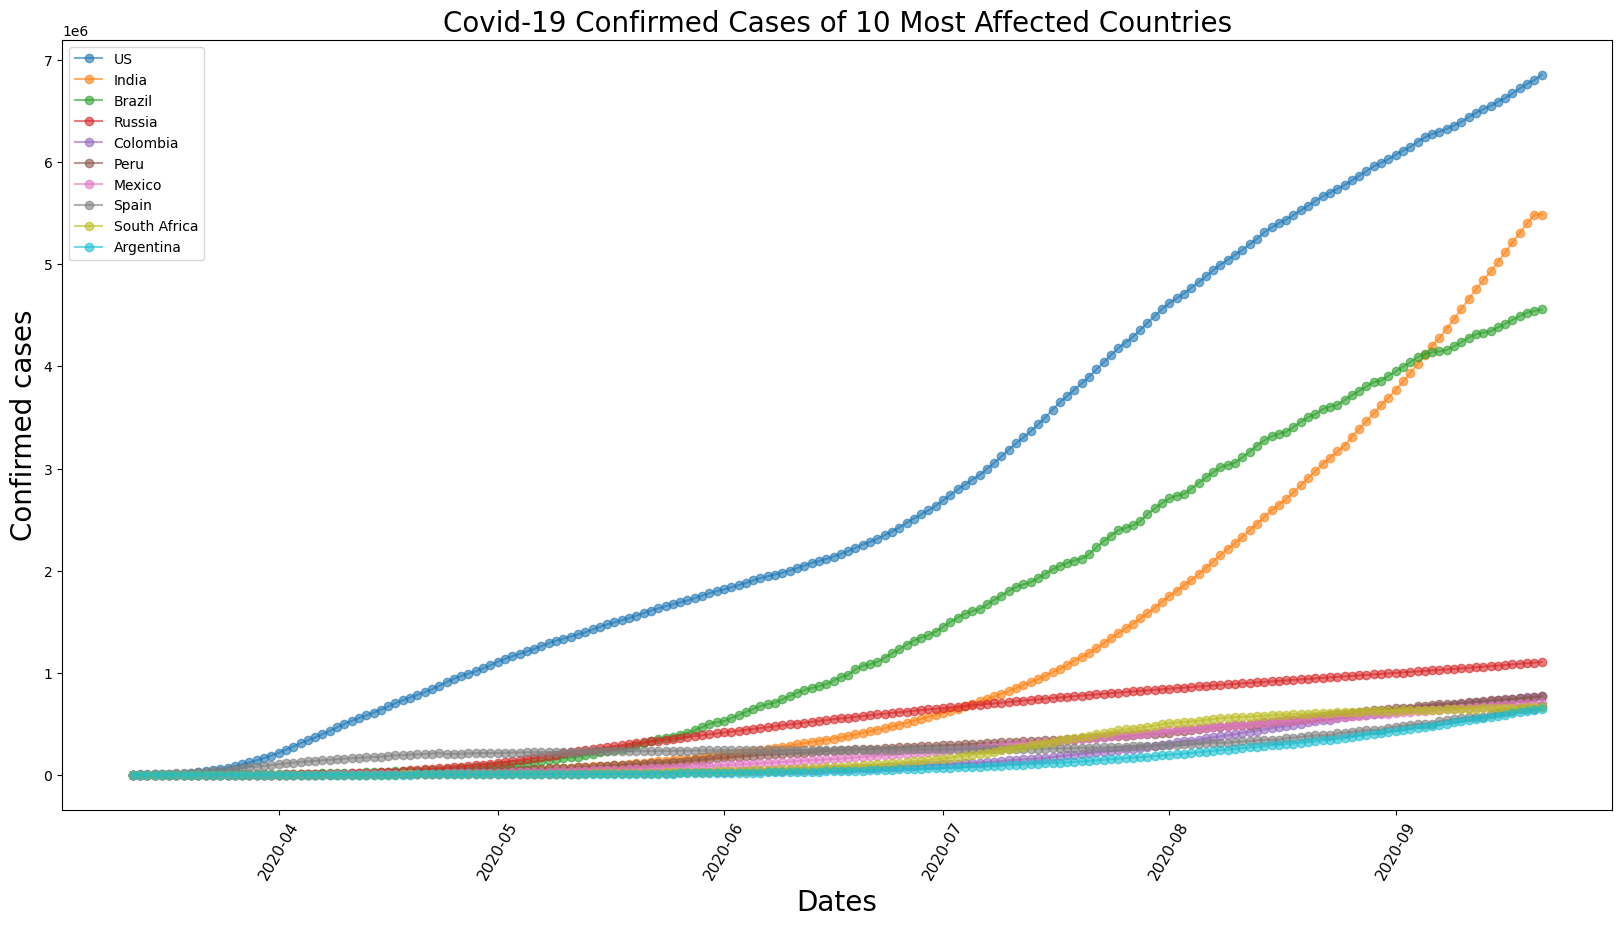

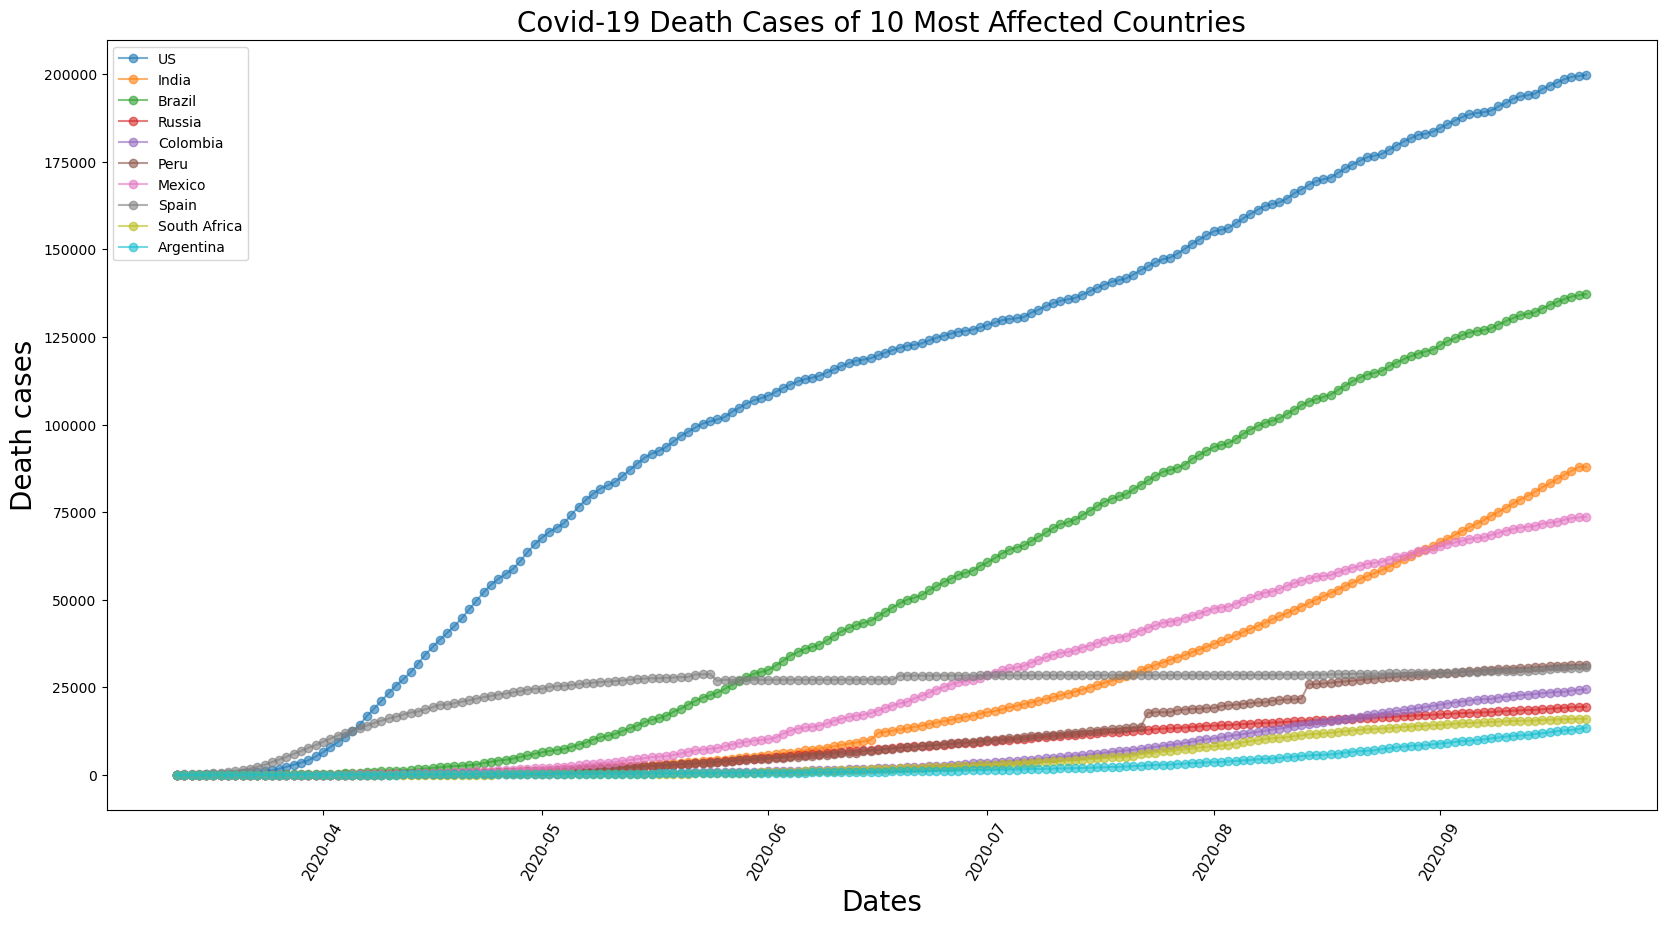

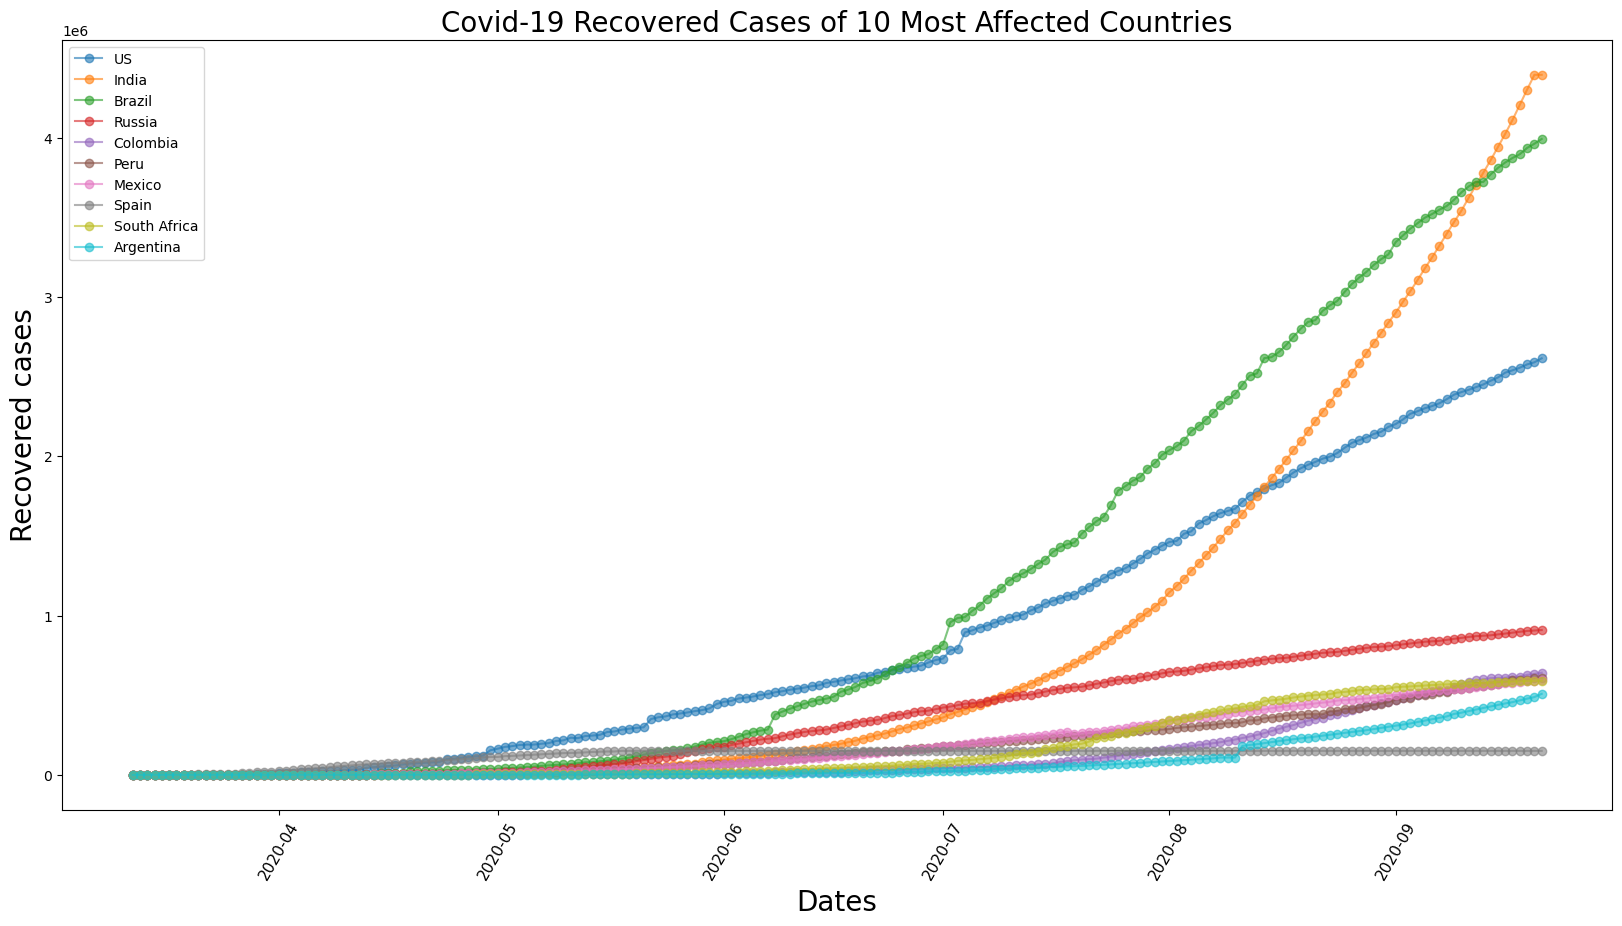

In [43]:
compare_plt('Confirmed')
compare_plt('Death')
compare_plt('Recovered')

**Covid19 Confirmed Cases** 
The line graph depicts the cumulative confirmed COVID-19 cases for the 10 most affected countries. The US leads with the highest number of confirmed cases, surpassing 7 million by early October. India and Brazil follow, with India’s cases rising sharply in August and September. Russia and Colombia show steady increases, while Peru, Mexico, Spain, South Africa, and Argentina have comparatively lower trajectories. This visualization highlights the varying rates of infection spread across different countries.

**Covid19 Death Cases**
The line graph shows the cumulative COVID-19 death cases for the 10 most affected countries. The US has the highest number of death cases, surpassing 200,000 by early October, followed by Brazil with over 150,000 deaths. India also shows a significant increase, nearing 100,000 deaths. Other countries like Russia, Colombia, Peru, Mexico, Spain, South Africa, and Argentina have lower death tolls but exhibit steady increases. This graph highlights the severe impact of COVID-19 in terms of mortality across these nations, with a stark disparity in death counts.

**Covid19 Confirmed Cases** 
The line graph shows the cumulative recovered COVID-19 cases for the 10 most affected countries. India has the highest number of recoveries, nearing 5 million by early October, followed by Brazil with over 4 million recoveries. The US also shows a significant number of recoveries, exceeding 4 million. Other countries like Russia, Colombia, Peru, and Mexico have lower but steadily increasing recovery counts. This graph highlights the effectiveness of recovery efforts and the varying rates of recovery across different nations, with India leading in total recoveries.

## Confirmed, Recovered, Active and Death cases in US

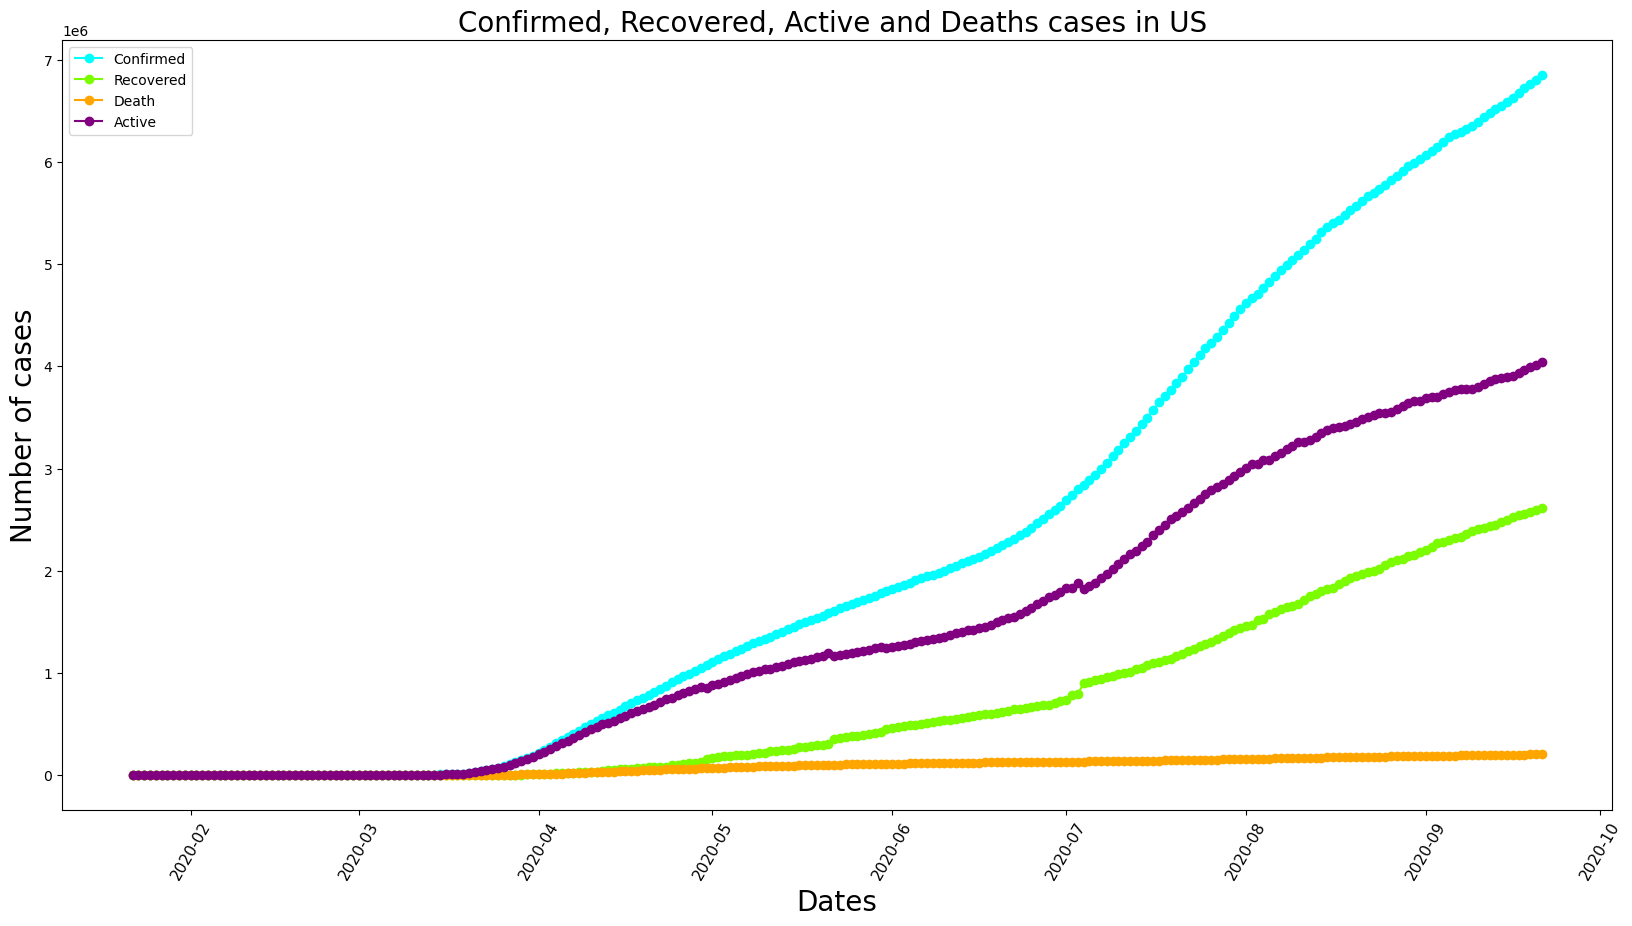

In [44]:
dates = covid19_world['Date'][:]

iran_df=covid19_date_country[covid19_date_country['Country/Region'] == 'US'].iloc[:,:] 

plt.figure(figsize= (20,10))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Number of cases',fontsize = 20)
plt.title("Confirmed, Recovered, Active and Deaths cases in US " , fontsize = 20)

ax1 = plt.plot_date(y= iran_df['Confirmed'].values,x= dates,label = 'Confirmed',linestyle ='-',color = 'cyan')
ax2 = plt.plot_date(y= iran_df['Recovered'].values,x= dates,label = 'Recovered',linestyle ='-',color = 'lawngreen')
ax3 = plt.plot_date(y= iran_df['Death'].values,x= dates,label = 'Death',linestyle ='-',color = 'orange')
ax4 = plt.plot_date(y= iran_df['Active'].values,x= dates,label = 'Active',linestyle ='-',color = 'purple')
plt.legend()

#### The graph illustrates the cumulative number of confirmed, recovered, active, and death cases of COVID-19 in the US. Confirmed cases (in light blue) exceed 7 million by early October. Recovered cases (in green) and active cases (in purple) show a significant upward trend, with recoveries approaching 5 million and active cases peaking and then stabilizing. Death cases (in orange) rise steadily but remain lower in comparison to confirmed and recovered cases, reaching about 200,000. This indicates a substantial number of recoveries despite the high infection rate.

## Total COVID-19 confirmed, recovered, active and deaths cases (globally)

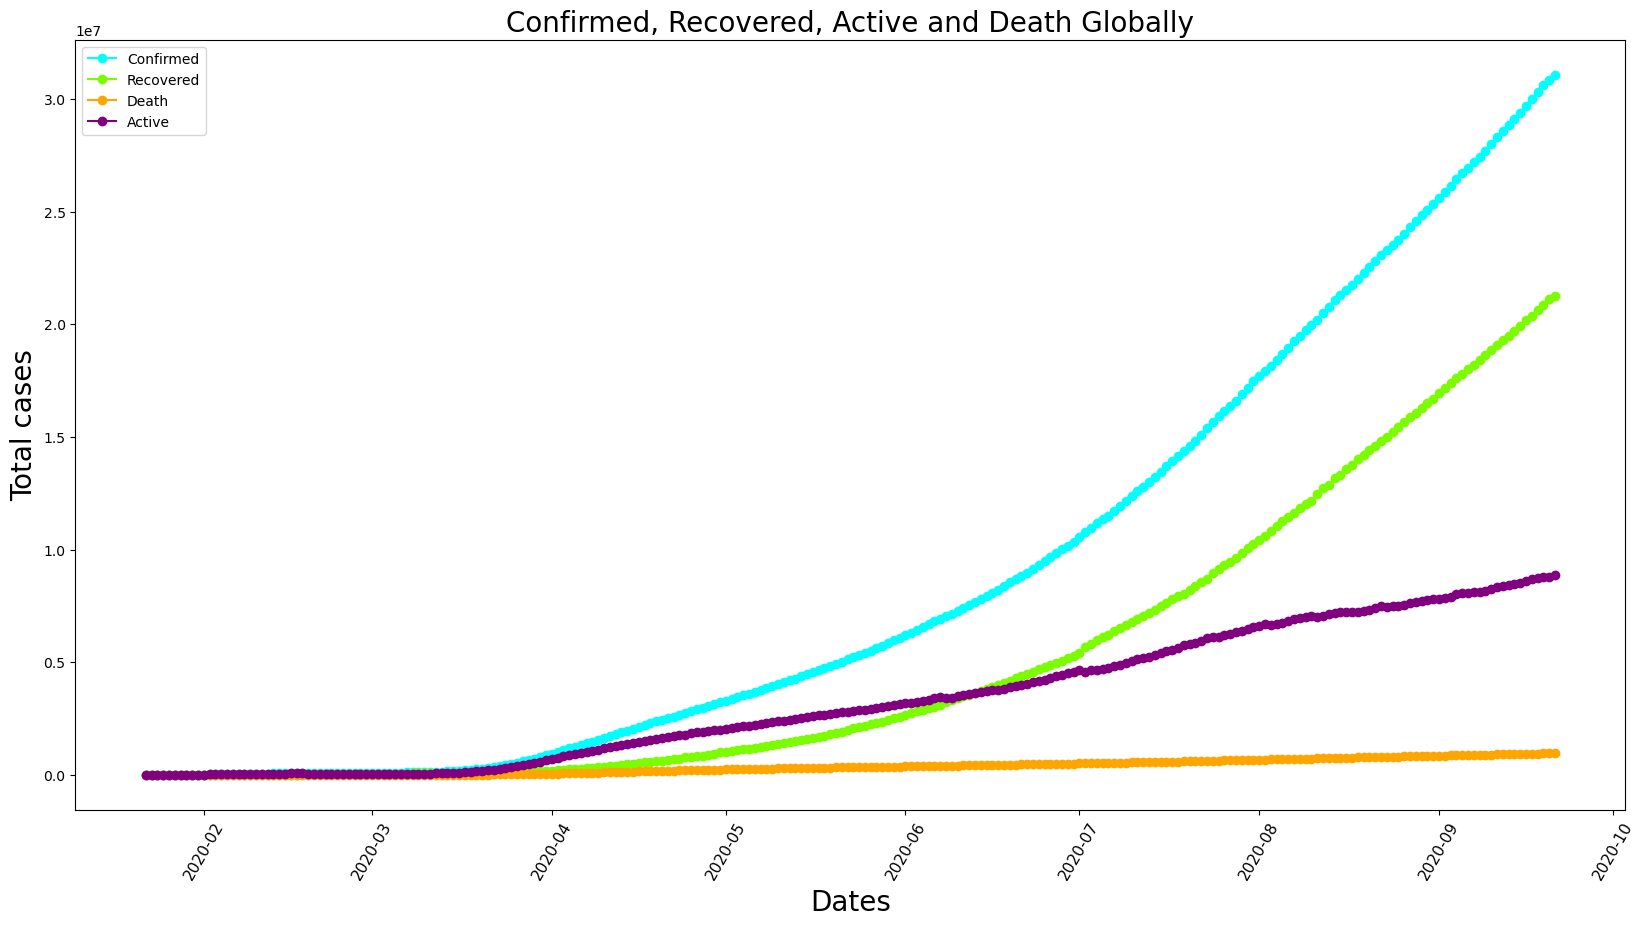

In [45]:
dates = covid19_world['Date'][:]

world_df=covid19_world.iloc[:,:] 

plt.figure(figsize= (20,10))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Confirmed, Recovered, Active and Death Globally" , fontsize = 20)

ax1 = plt.plot_date(y= world_df['Confirmed'].values,x= dates,label = 'Confirmed',linestyle ='-',color = 'cyan')
ax2 = plt.plot_date(y= world_df['Recovered'].values,x= dates,label = 'Recovered',linestyle ='-',color = 'lawngreen')
ax3 = plt.plot_date(y= world_df['Death'].values,x= dates,label = 'Death',linestyle ='-',color = 'orange')
ax4 = plt.plot_date(y= world_df['Active'].values,x= dates,label = 'Active',linestyle ='-',color = 'purple')
plt.legend()

#### The graph shows the global trend of COVID-19 cases over time, divided into four categories: Confirmed, Recovered, Death, and Active cases. Confirmed cases (cyan line) and Recovered cases (green line) show a steep and continuous rise, indicating a significant spread and recovery rate over the period. Active cases (purple line) also increase but at a slower rate, while Death cases (orange line) remain relatively low compared to the other categories. The overall trend demonstrates the global impact and progression of the pandemic over the observed months.

In [46]:
covid19_country_latest.copy().sort_values('Confirmed',ascending=False)\
                    .reset_index(drop=True).iloc[:30,:].style.bar(align='left',width=80,color='white')

,Country/Region,Confirmed,Death,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100)
0,US,6856884,199865,2615949,4041070,52070,356,25278,38.150000,2.910000
1,India,5487580,87882,4396399,1003299,0,0,0,80.120000,1.600000
2,Brazil,4558040,137272,3993432,427336,13411,377,29986,87.610000,3.010000
3,Russia,1105048,19420,909026,176602,6090,71,2595,82.260000,1.760000
4,Colombia,770435,24397,640900,105138,5359,189,7701,83.190000,3.170000
5,Peru,768895,31369,607837,129689,6030,0,0,79.050000,4.080000
6,Mexico,700580,73697,596317,30566,2917,204,5858,85.120000,10.520000
7,Spain,671468,30663,150376,490429,31428,168,0,22.400000,4.570000
8,South Africa,661936,15992,591208,54736,725,39,1137,89.310000,2.420000
9,Argentina,640147,13482,508563,118102,8782,429,20332,79.440000,2.110000


## Model creation 
### Forecasting
### Prediction of total confirmed cases of the world

In [47]:
# for date and time operations
from datetime import datetime,timedelta

# find numbers related to dates
numbers_of_dates = covid19_world.index.values.reshape(-1, 1)

# number of days in future considered to forecast
future_days = 10

# find numbers related to days from start to future
numbers_start_to_futures = np.array([i for i in range(covid19_world.shape[0]+future_days)]).reshape(-1, 1)

# first date in the dataset
first_date = covid19_world['Date'].tolist()[0]

# find dates related to days from start to future for better visualization
dates_start_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(len(numbers_start_to_futures))])
print(dates_start_to_futures.shape)

(254,)


In [48]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

#Splitting the dataset related to confirmed cases of the world into training and test sets
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(numbers_of_dates[50:],
                                                                                covid19_world['Confirmed'][50:].values,
                                                                                test_size = 0.2, shuffle=False)
print(X_train_confirmed.shape)
print(y_train_confirmed.shape)
print(X_test_confirmed.shape)
print(y_test_confirmed.shape)

(155, 1)
(155,)
(39, 1)
(39,)


## Support vector machine regressor

RMSE of  SVR 2066969.8
MAE of  SVR 1769211.74
r2score of  SVR 0.74 



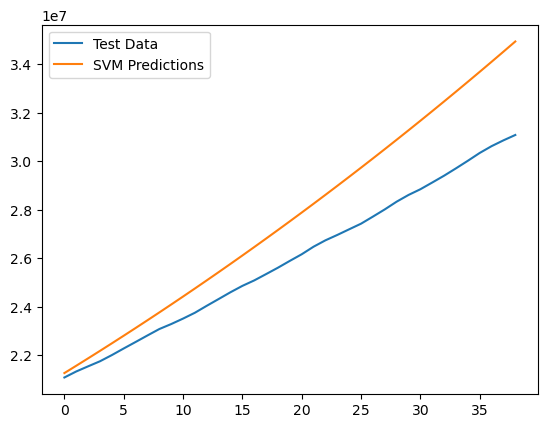

In [49]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

svm_reg = SVR(C=0.1,kernel='poly',gamma=0.01, epsilon=1)
svm_reg.fit(X_train_confirmed, y_train_confirmed)

svm_pred = svm_reg.predict(numbers_start_to_futures[50:].reshape(-1,1))

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
r2score=r2_score(y_pred, y_test_confirmed)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2))
print("r2score of ",svm_reg.__class__.__name__, round(r2score,2), '\n')


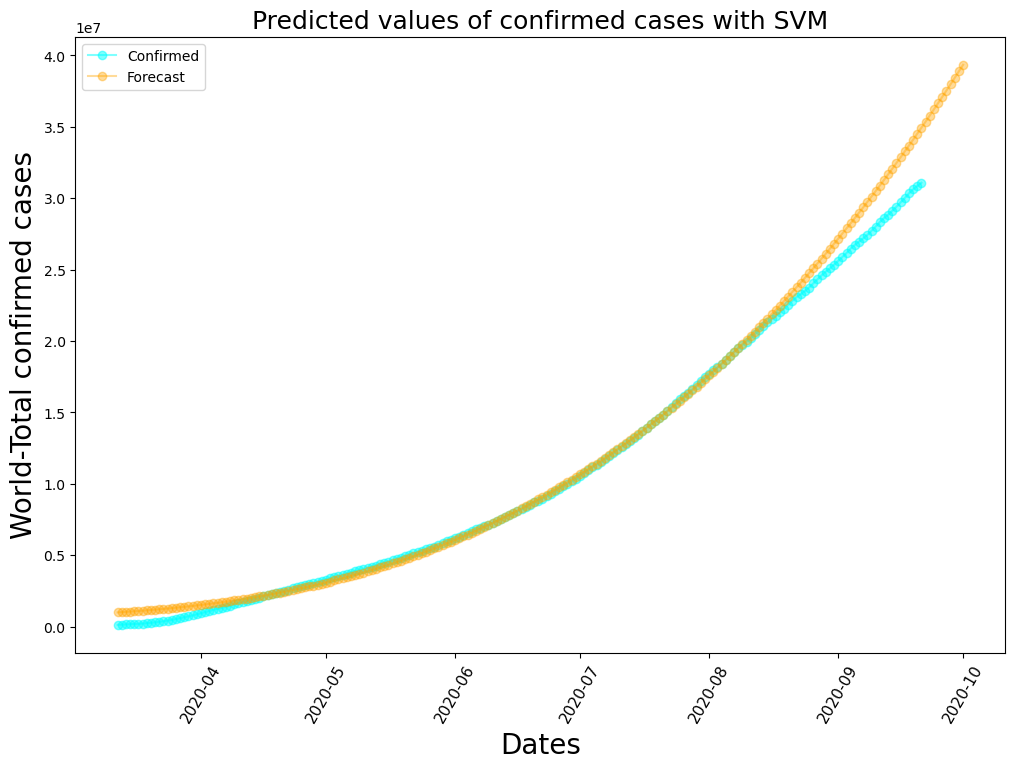

In [50]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with SVM" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= svm_pred,x= dates_start_to_futures[50:],label = 'Forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

## Linear regression

coef:  [ 0.00000000e+00  1.07573598e+05 -6.68033122e+02  3.22173702e+00
  2.24459140e-03]
RMSE of  LinearRegression 2843735.69
MAE of  LinearRegression 2431862.83
r2score of  LinearRegression 0.59 



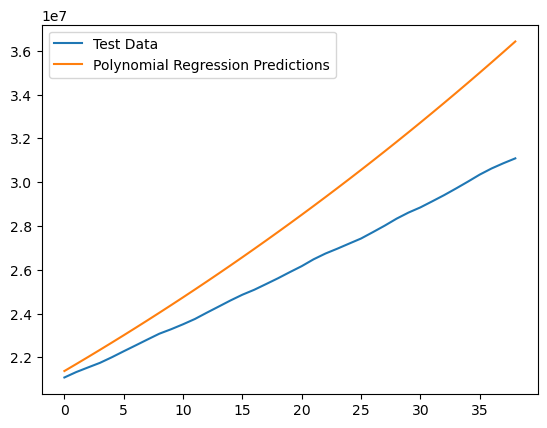

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# transform the training data
poly_features=PolynomialFeatures(degree=4)

poly_X_train_confirmed = poly_features.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly_features.fit_transform(X_test_confirmed)
poly_future_forecast = poly_features.fit_transform(numbers_start_to_futures[50:])

# fit a Linear Regression model
lin_reg=LinearRegression()

lin_reg.fit(poly_X_train_confirmed,y_train_confirmed)
coef=lin_reg.coef_
print("coef: ", coef)

y_pred = lin_reg.predict(poly_X_test_confirmed)

poly_pred = lin_reg.predict(poly_future_forecast)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
r2score=r2_score(y_pred, y_test_confirmed)
print("RMSE of ", lin_reg.__class__.__name__, round(rmse,2))
print("MAE of ", lin_reg.__class__.__name__, round(mae,2))
print("r2score of ",lin_reg.__class__.__name__, round(r2score,2), '\n')

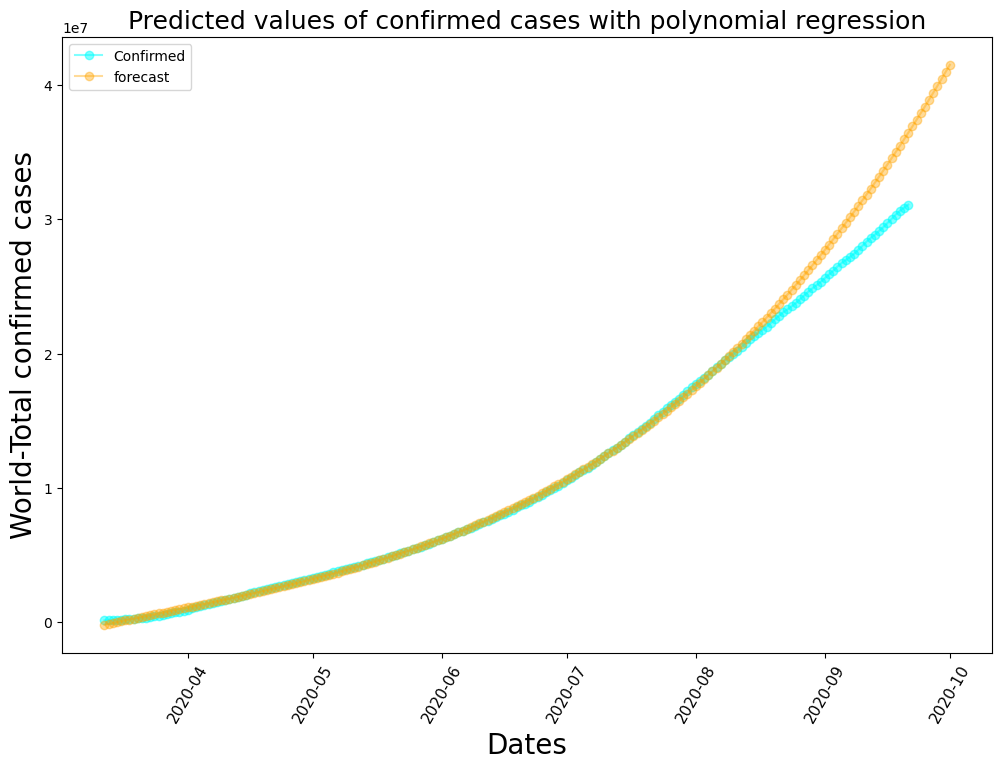

In [52]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with polynomial regression" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= poly_pred,x= dates_start_to_futures[50:],label = 'forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

## Random Forests Regressor

RMSE of  RandomForestRegressor 6122371.33
MAE of  RandomForestRegressor 5343973.32
r2score of  RandomForestRegressor 0.0 



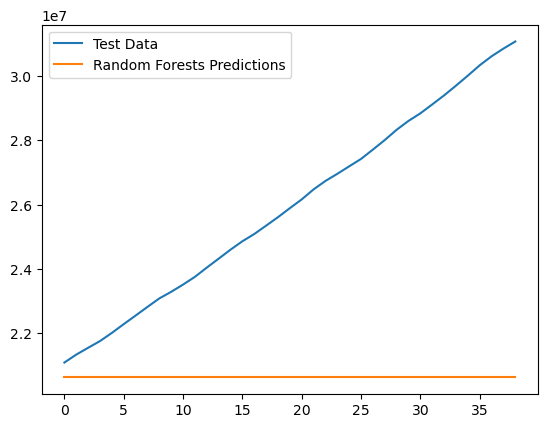

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth=7,n_estimators=5000, random_state=42)

rf_reg.fit(X_train_confirmed, y_train_confirmed)

rf_pred = rf_reg.predict(numbers_start_to_futures[50:].reshape(-1,1))

y_pred = rf_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Random Forests Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
r2score=r2_score(y_pred, y_test_confirmed)
print("RMSE of ", rf_reg.__class__.__name__, round(rmse,2))
print("MAE of ", rf_reg.__class__.__name__, round(mae,2))
print("r2score of ",rf_reg.__class__.__name__, round(r2score,2), '\n')

In [54]:
y_pred

array([20613632.01773334, 20613632.01773334, 20613632.01773334,
       20613632.01773334, 20613632.01773334, 20613632.01773334,
       20613632.01773334, 20613632.01773334, 20613632.01773334,
       20613632.01773334, 20613632.01773334, 20613632.01773334,
       20613632.01773334, 20613632.01773334, 20613632.01773334,
       20613632.01773334, 20613632.01773334, 20613632.01773334,
       20613632.01773334, 20613632.01773334, 20613632.01773334,
       20613632.01773334, 20613632.01773334, 20613632.01773334,
       20613632.01773334, 20613632.01773334, 20613632.01773334,
       20613632.01773334, 20613632.01773334, 20613632.01773334,
       20613632.01773334, 20613632.01773334, 20613632.01773334,
       20613632.01773334, 20613632.01773334, 20613632.01773334,
       20613632.01773334, 20613632.01773334, 20613632.01773334])

In [55]:
y_test_confirmed

array([21078994, 21326965, 21539188, 21747923, 22003108, 22276180,
       22542929, 22812808, 23077895, 23283416, 23508865, 23750447,
       24037672, 24316288, 24597181, 24858764, 25084632, 25345500,
       25609683, 25890786, 26163481, 26475856, 26738923, 26960672,
       27194011, 27425381, 27716762, 28014562, 28333584, 28610566,
       28846255, 29123825, 29406046, 29708779, 30020912, 30343816,
       30624175, 30863980, 31085798], dtype=int64)

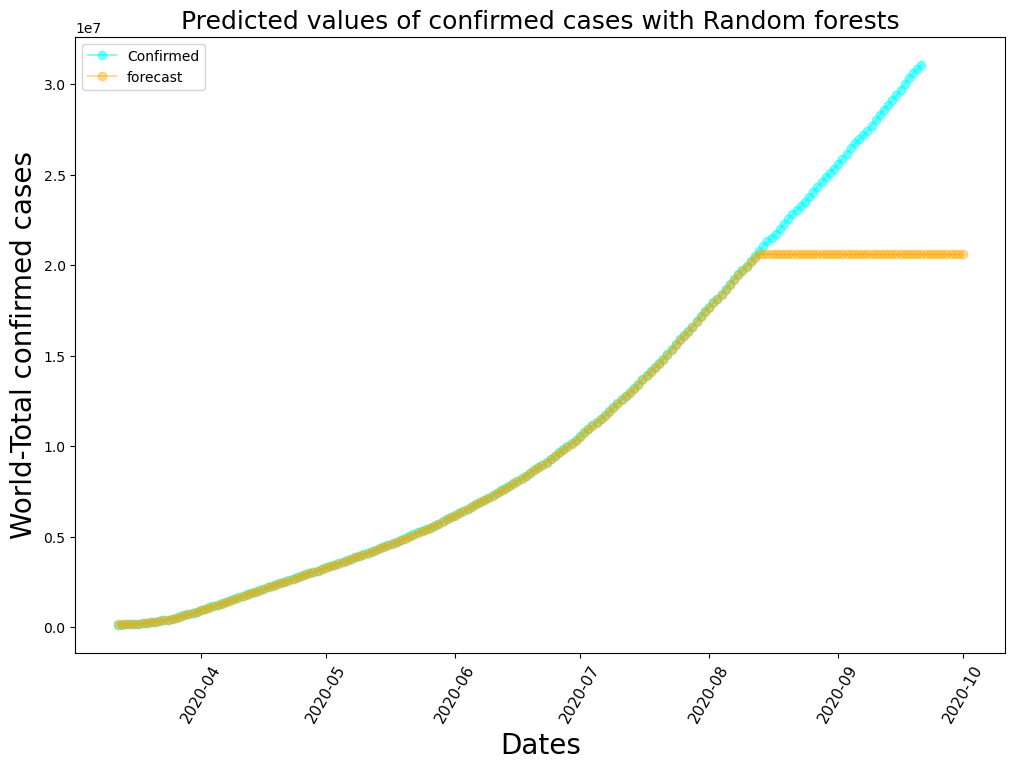

In [56]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with Random forests" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= rf_pred,x= dates_start_to_futures[50:],label = 'forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

## ARIMA for prediction

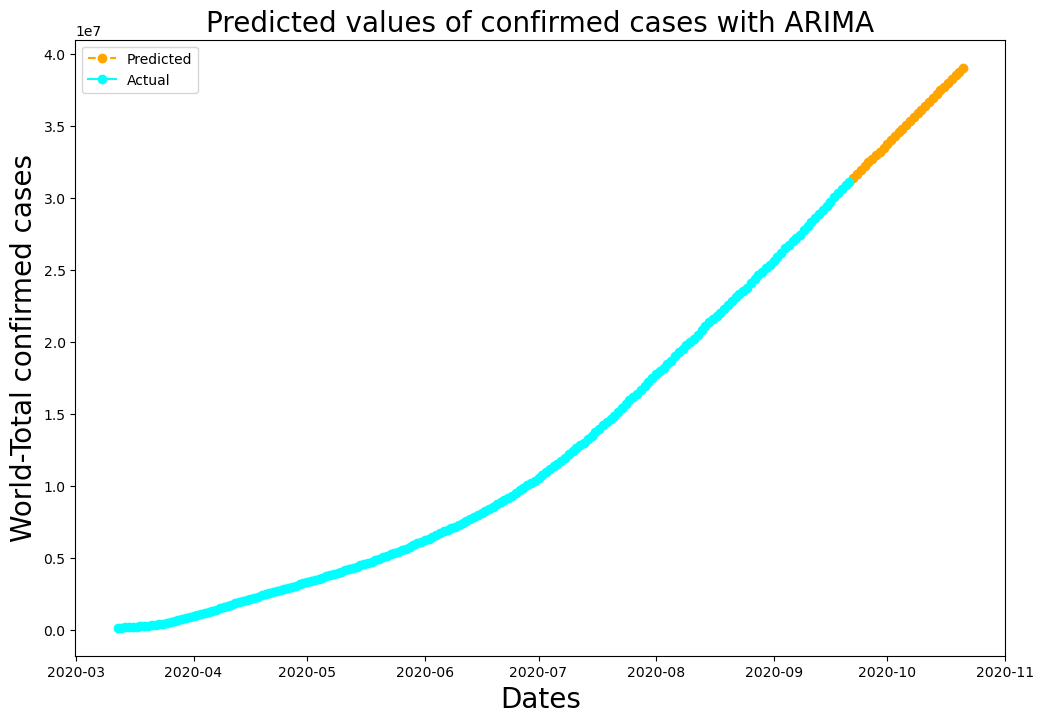

In [57]:
from statsmodels.tsa.arima.model import ARIMA

data = pd.DataFrame(columns = ['Date','y'])
data['Date'] = covid19_world['Date'][50:]
data['y'] = covid19_world['Confirmed'][50:].values

arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit()
forecast_steps = 30
forecast = arima.forecast(steps=forecast_steps)
pred = forecast

start_date = data['Date'].max()
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (12,8))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with ARIMA" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'orange',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['Date'],linestyle = '-',color = 'cyan',label = 'Actual');
plt.legend();


## Prediction of confirmed cases of 10 most affected countries using ARIMA
## ARIMA for prediction

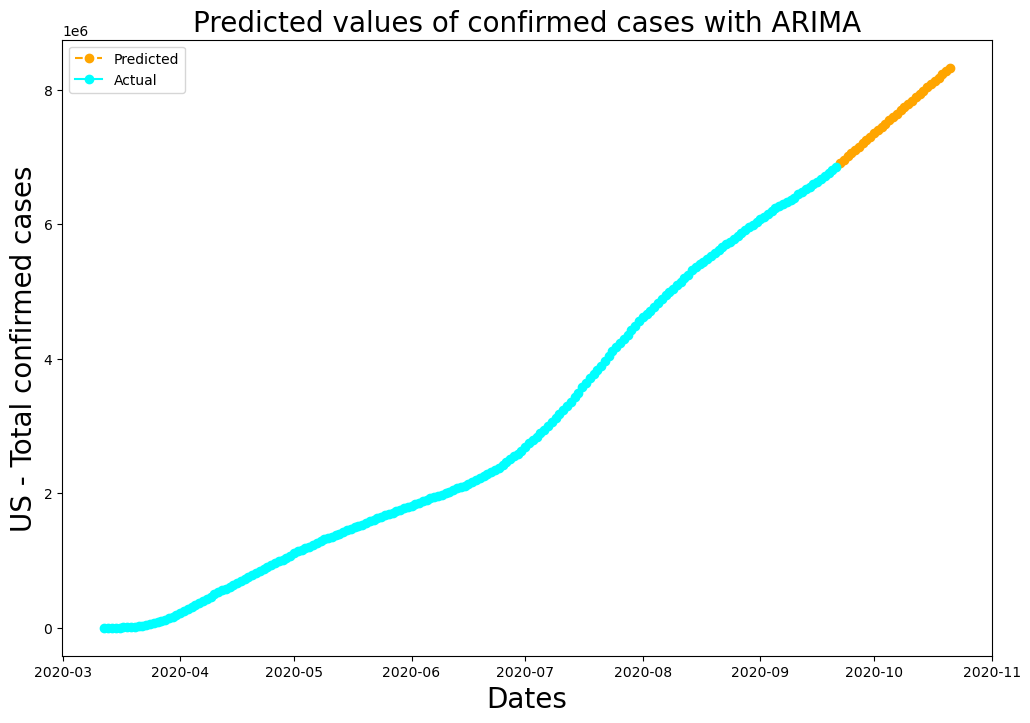

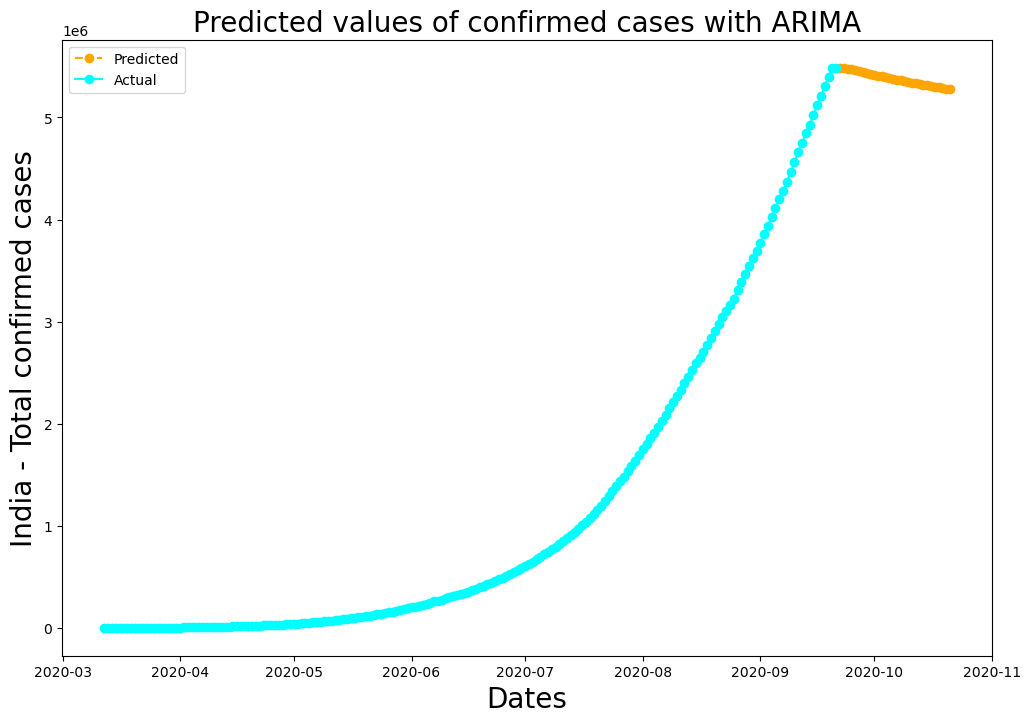

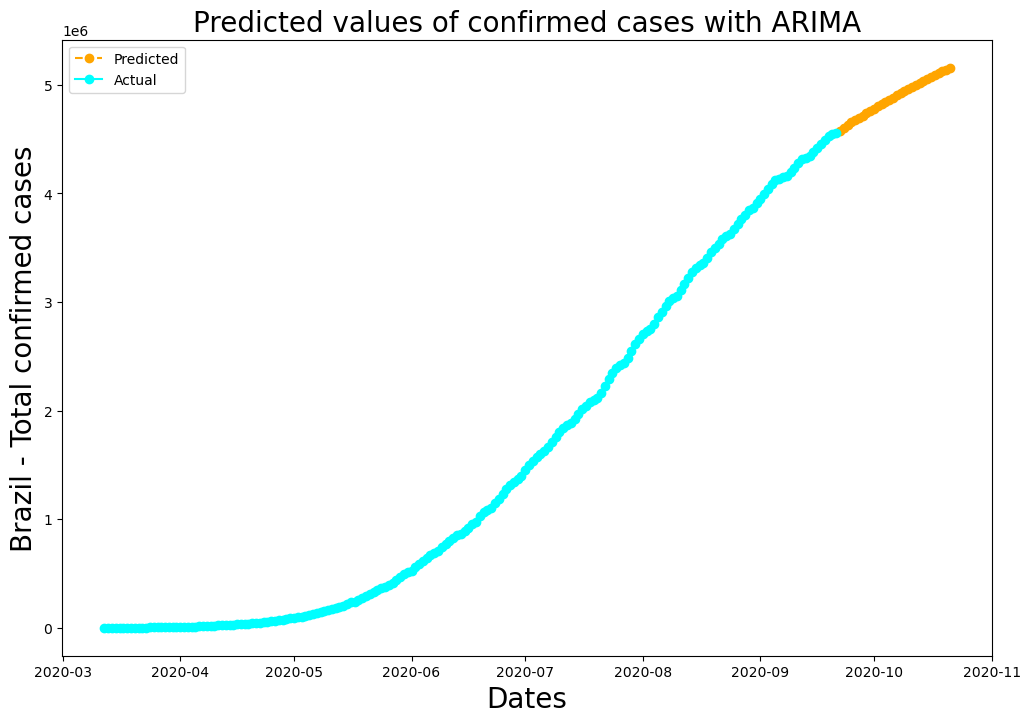

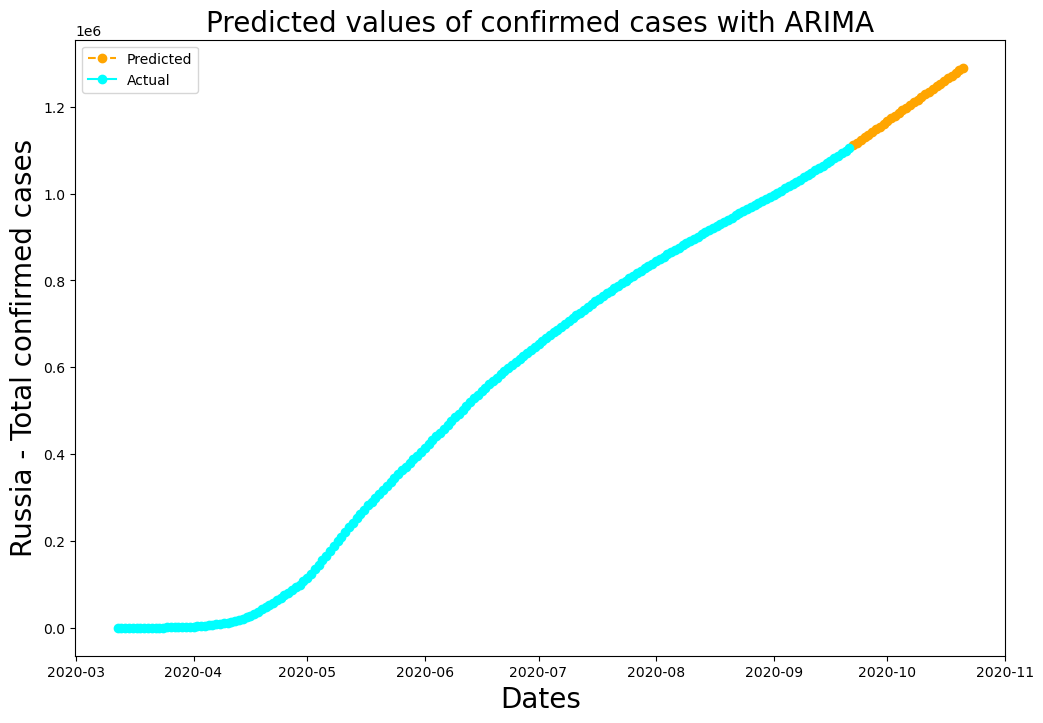

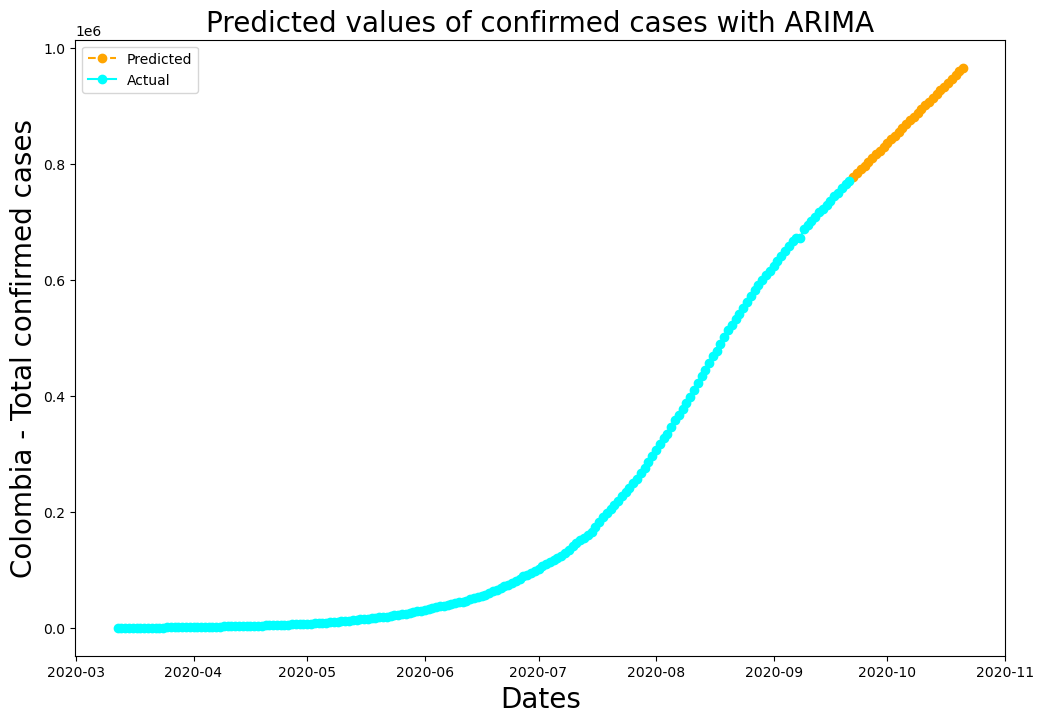

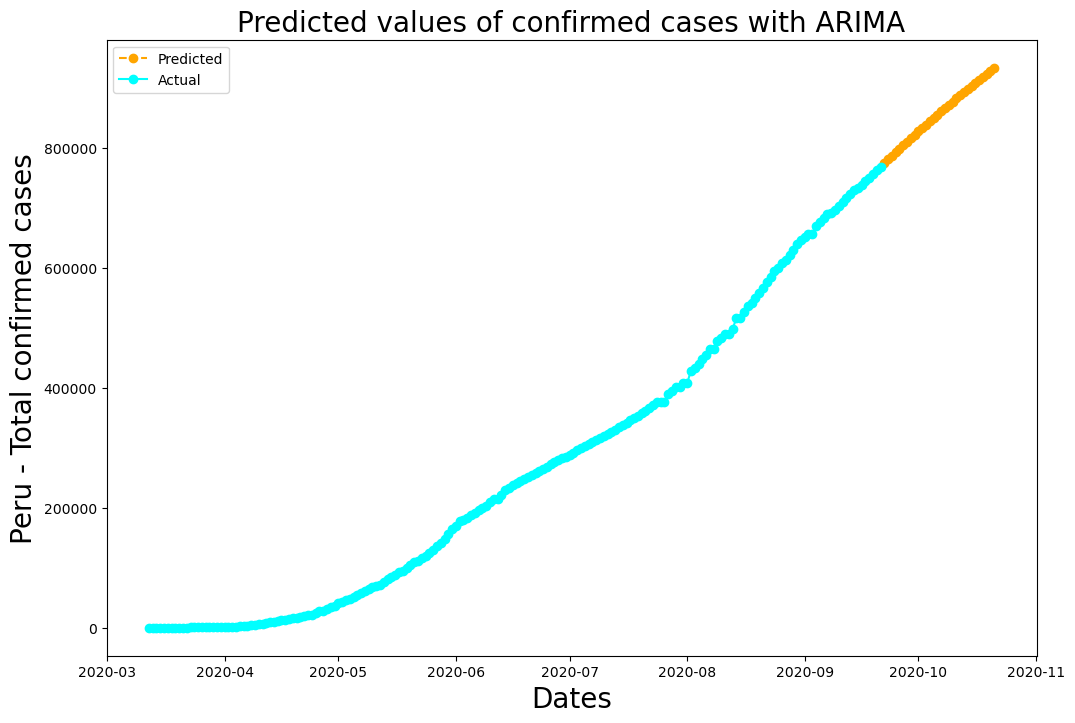

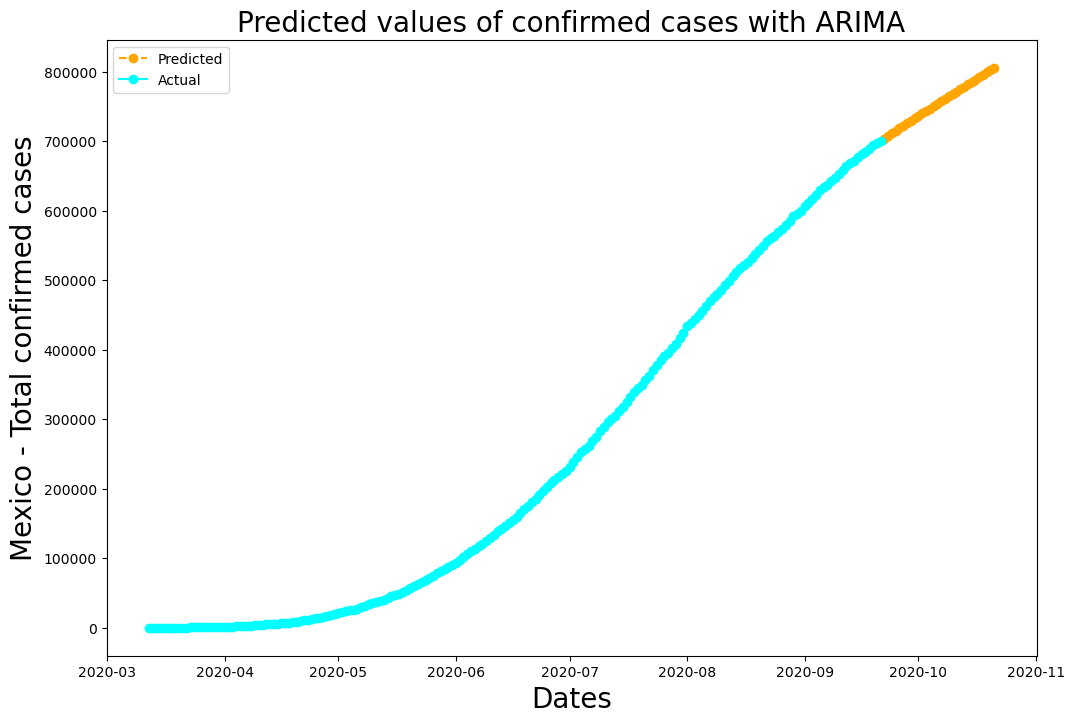

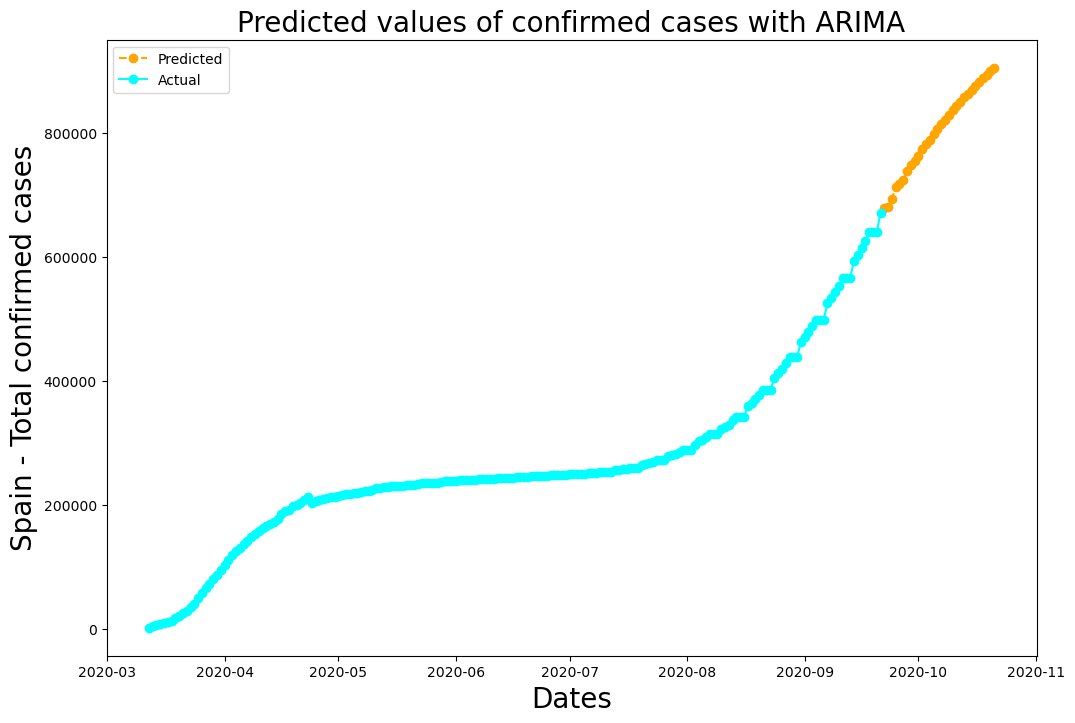

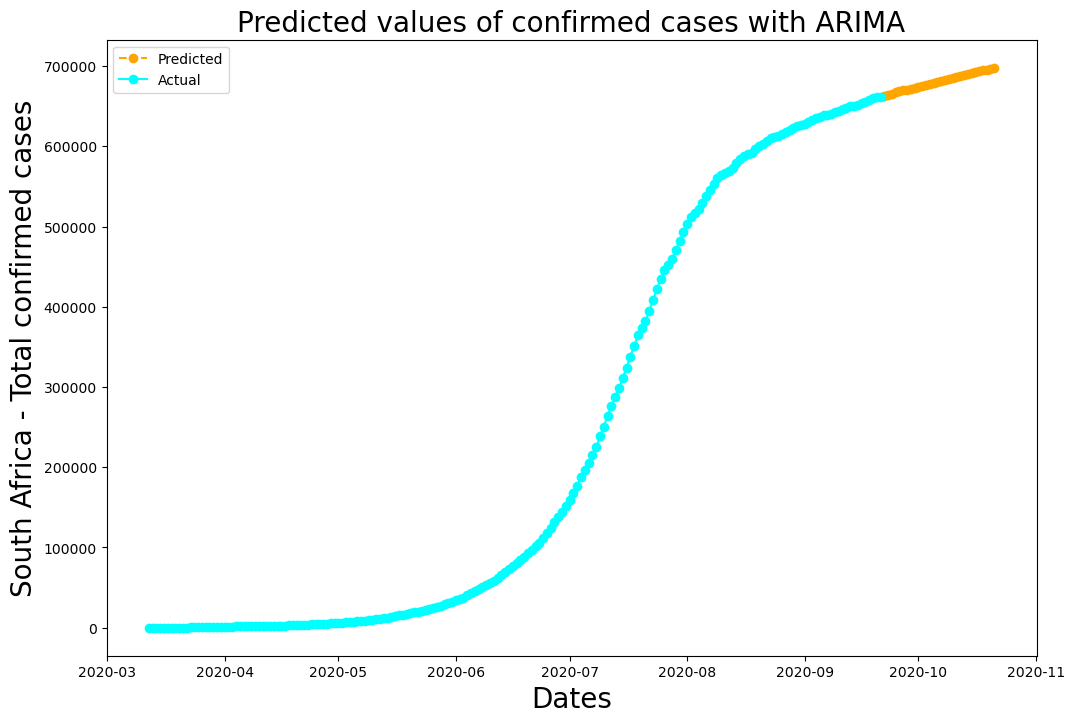

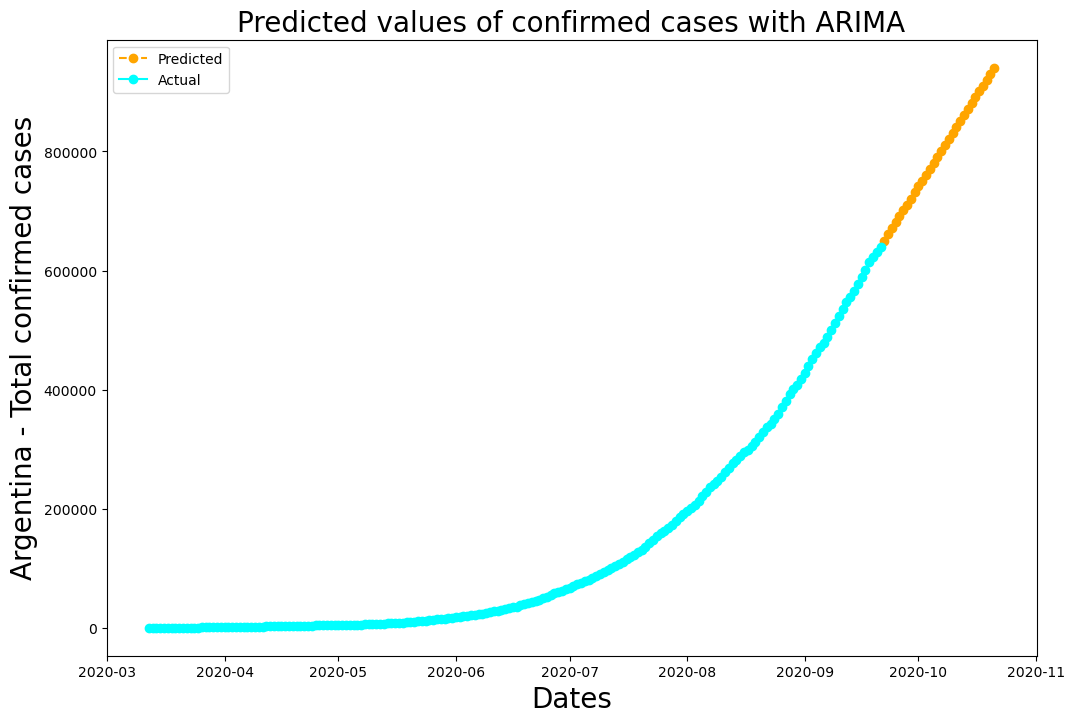

In [58]:
most_affected = ['US', 'India', 'Brazil', 'Russia', 'Colombia', 'Peru', 'Mexico', 'Spain', 'South Africa', 'Argentina']

def country_df(i):
    df = covid19_date_country[covid19_date_country['Country/Region'] == most_affected[i]].iloc[50:, :]
    return df

for k, country in enumerate(most_affected):
    # Prepare data for ARIMA model
    data = pd.DataFrame(columns=['Date', 'y'])
    data['Date'] = covid19_world['Date'][50:]
    data['y'] = country_df(k)['Confirmed'].values
    
    # Fit ARIMA model
    arima = ARIMA(data['y'], order=(5, 1, 0))
    arima = arima.fit()
    
    # Forecast for the next 30 days
    forecast_steps = 30
    forecast = arima.forecast(steps=forecast_steps)
    
    # Generate prediction dates
    start_date = data['Date'].max()
    prediction_dates = []
    for i in range(forecast_steps):
        date = start_date + timedelta(days=1)
        prediction_dates.append(date)
        start_date = date
    
    # Plot the results
    plt.figure(figsize=(12, 8))
    plt.xlabel("Dates", fontsize=20)
    plt.ylabel(f'{country} - Total confirmed cases', fontsize=20)
    plt.title("Predicted values of confirmed cases with ARIMA", fontsize=20)
    plt.plot_date(y=forecast, x=prediction_dates, linestyle='dashed', color='orange', label='Predicted')
    plt.plot_date(y=data['y'], x=data['Date'], linestyle='-', color='cyan', label='Actual')
    plt.legend()
    plt.show()

**Purpose:** Uses ARIMA (AutoRegressive Integrated Moving Average) model to predict the future number of confirmed cases in the ten most-affected countries.
**Outcome:** Provides visual predictions of confirmed cases for the next 30 days, allowing for a comparison between actual and predicted values.

## Prediction of Deaths cases of 10 most affected countries using ARIMA
## ARIMA for prediction

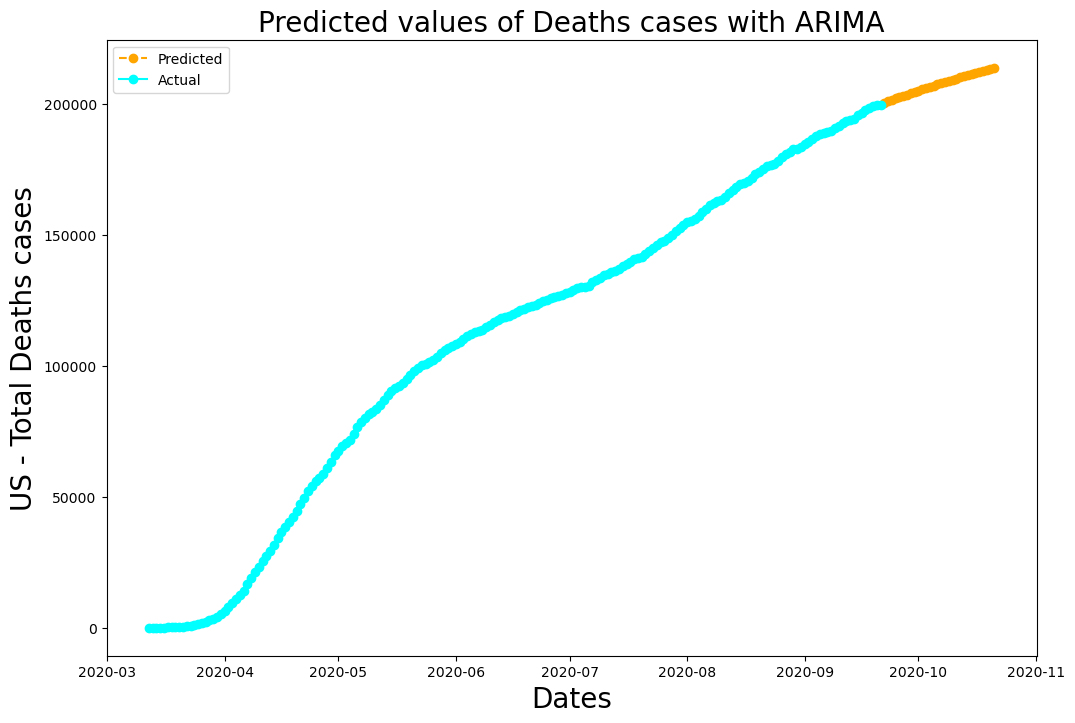

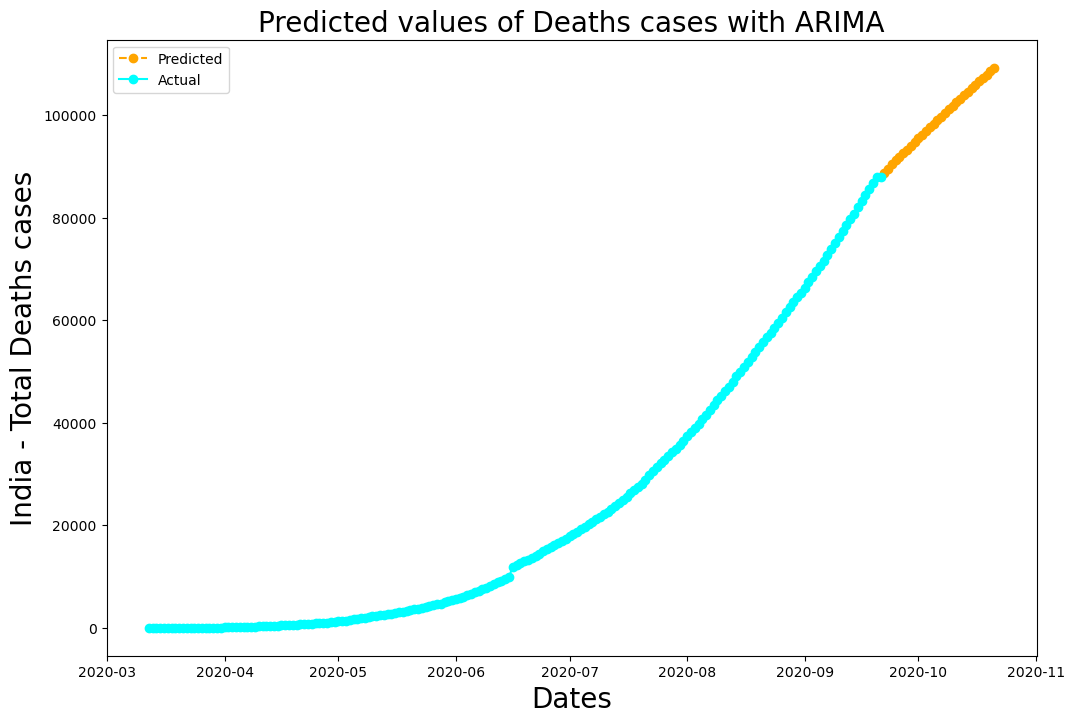

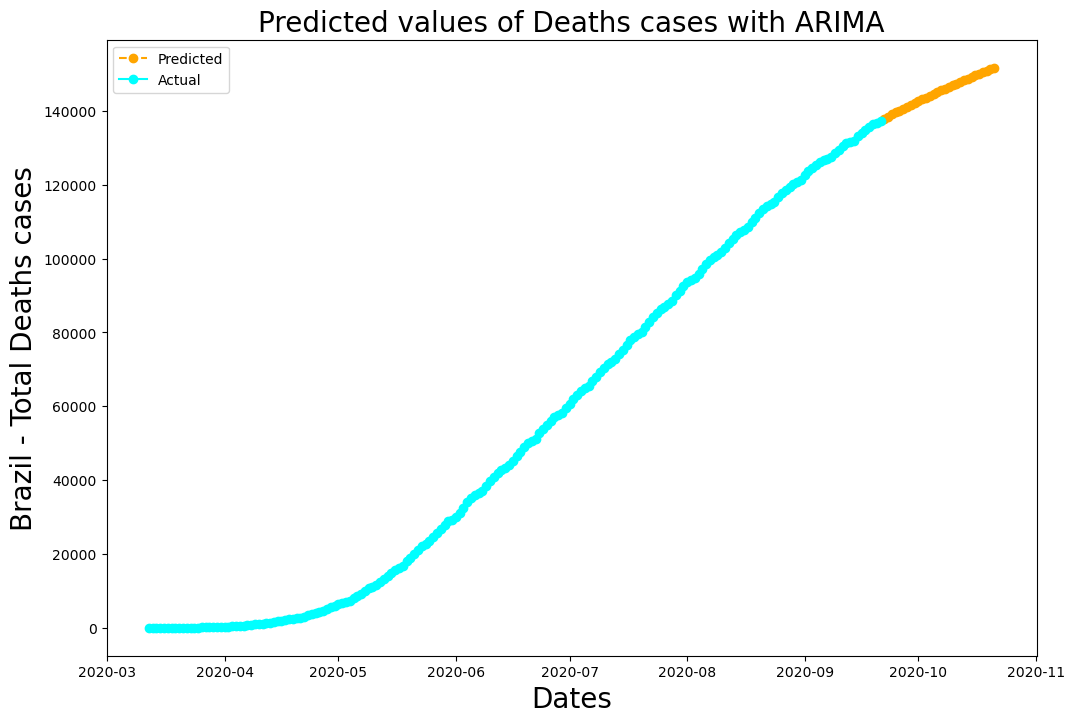

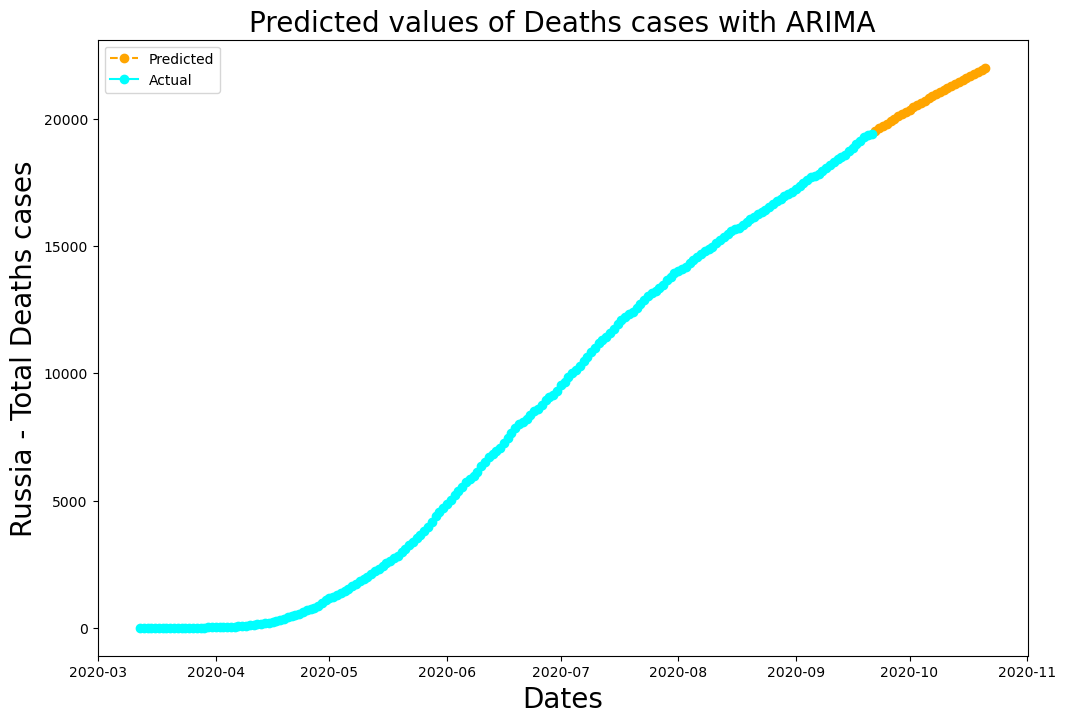

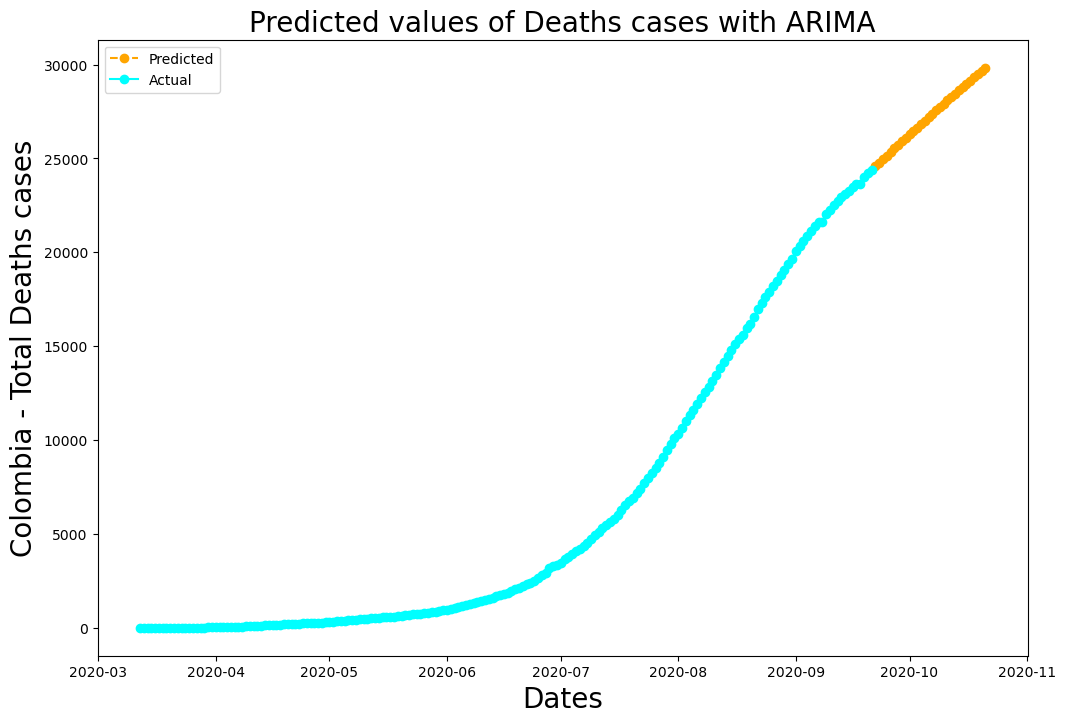

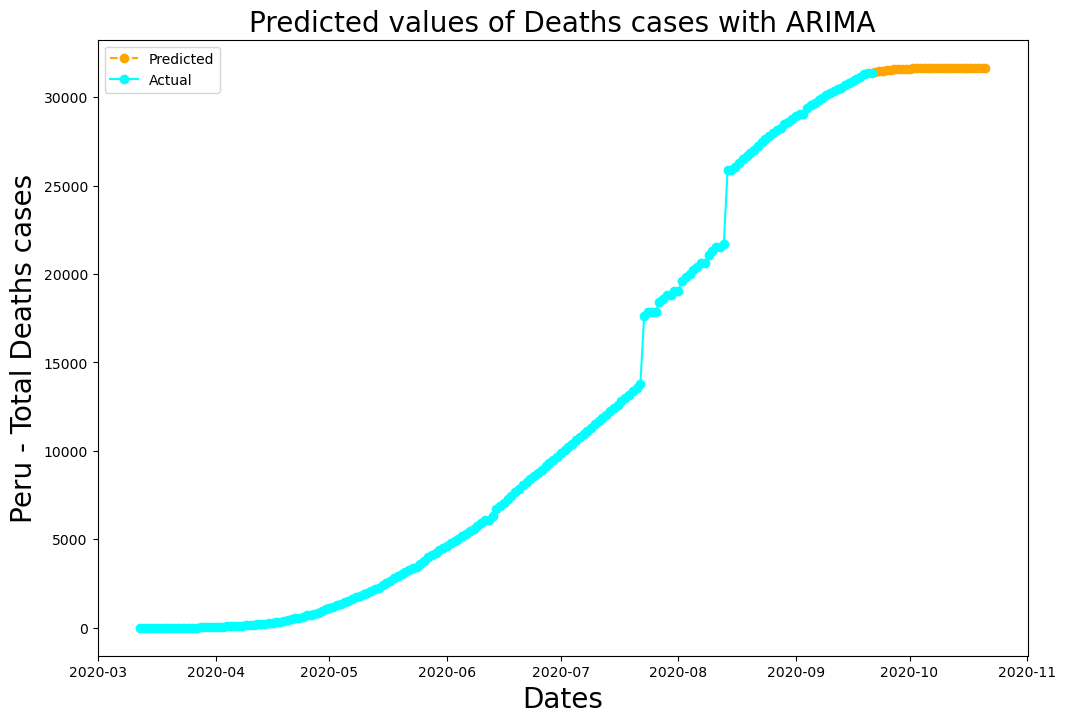

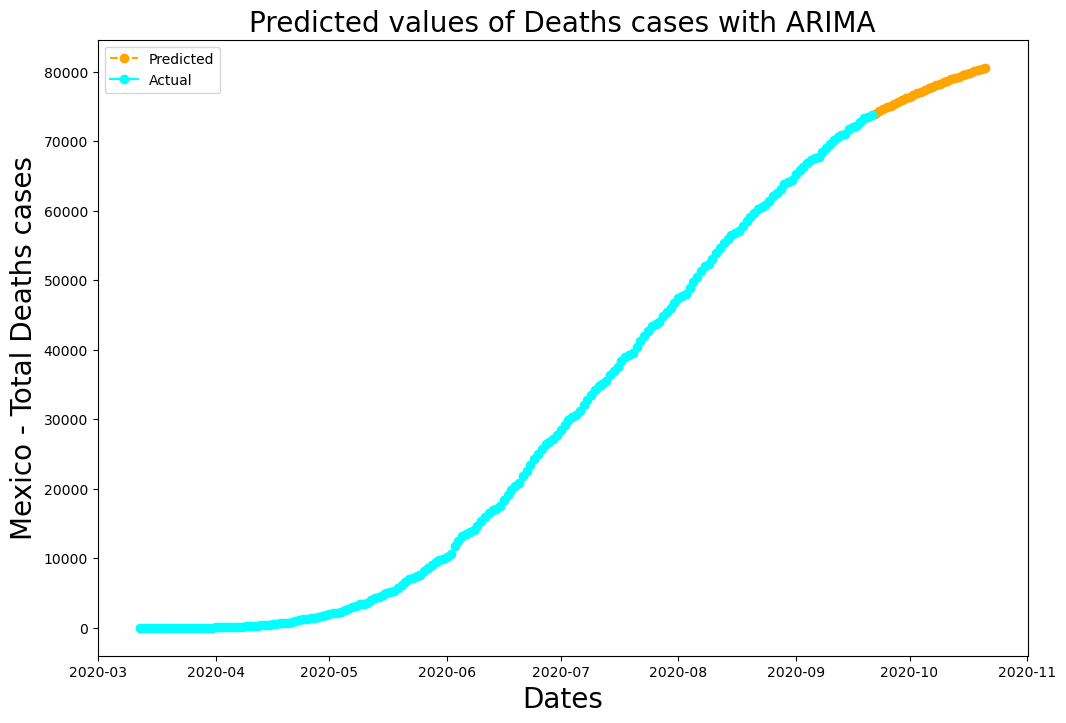

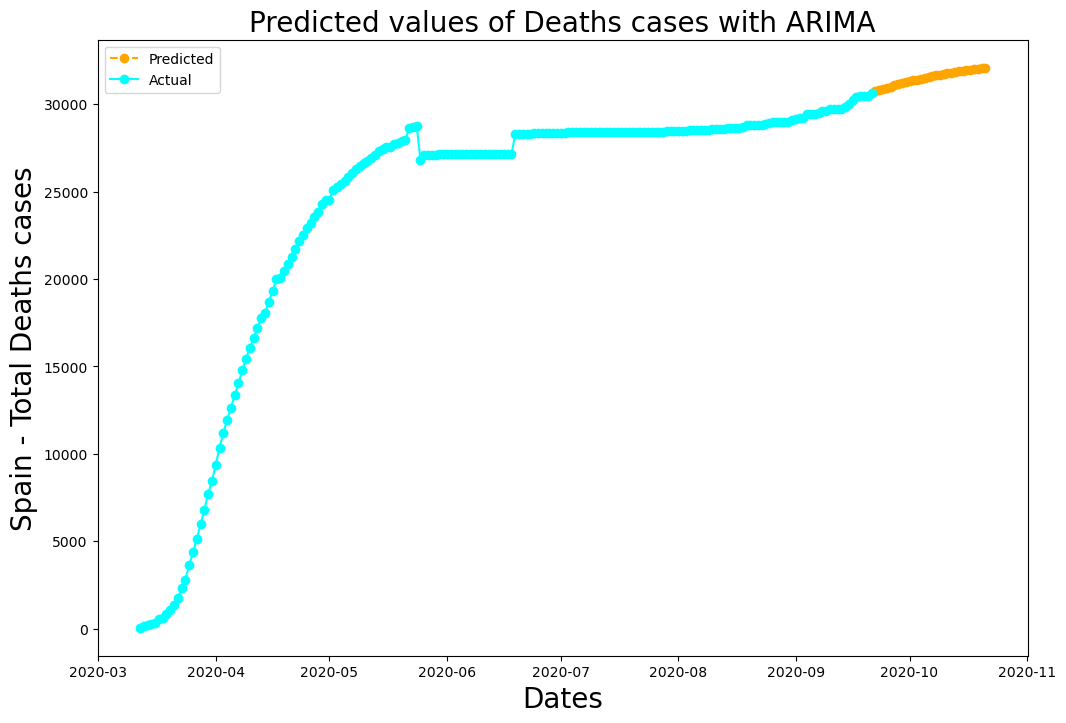

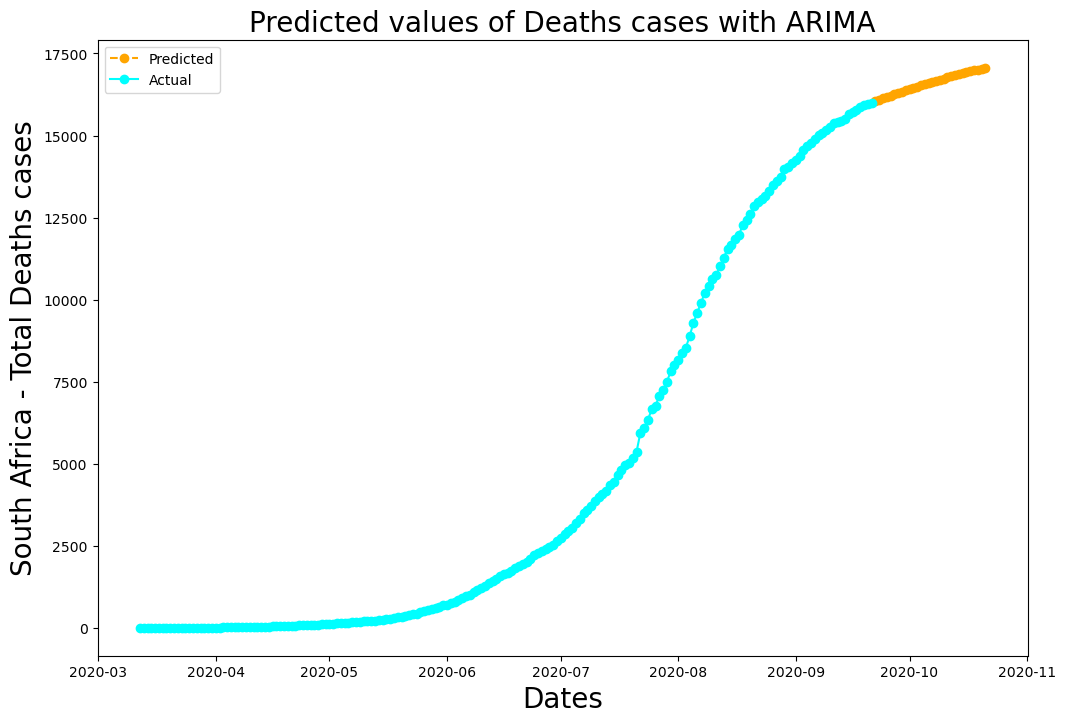

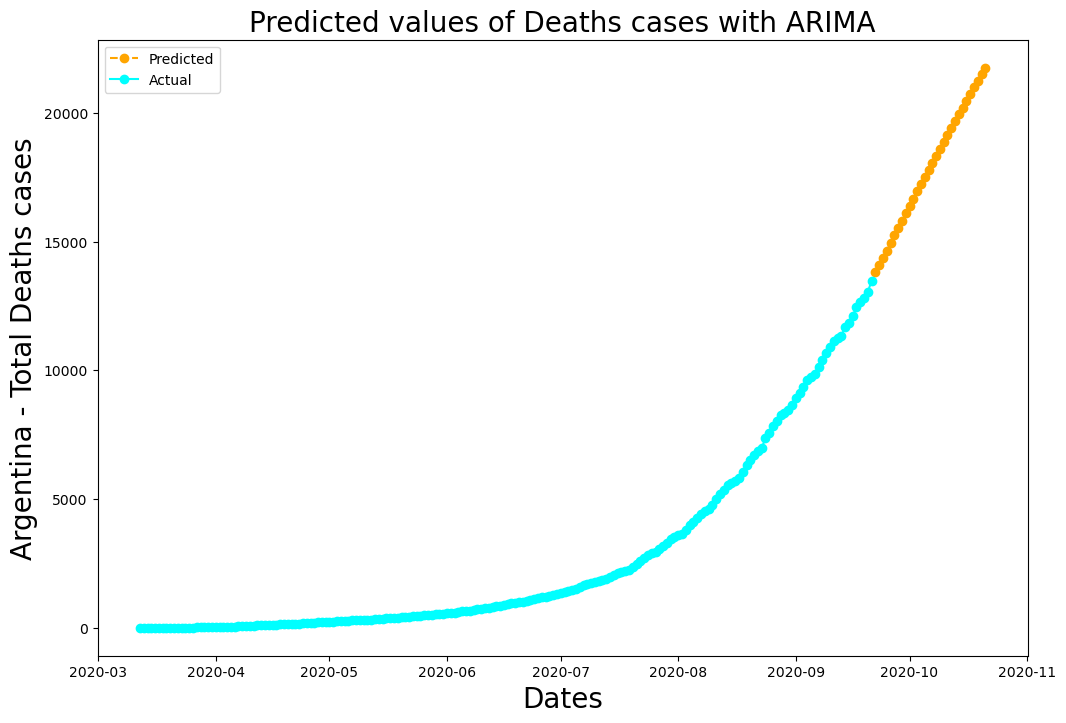

In [59]:
most_affected = ['US', 'India', 'Brazil', 'Russia', 'Colombia', 'Peru', 'Mexico', 'Spain', 'South Africa', 'Argentina']

def country_df(i):
    df = covid19_date_country[covid19_date_country['Country/Region'] == most_affected[i]].iloc[50:, :]
    return df

for k, country in enumerate(most_affected):
    # Prepare data for ARIMA model
    data = pd.DataFrame(columns=['Date', 'y'])
    data['Date'] = covid19_world['Date'][50:]
    data['y'] = country_df(k)['Death'].values
    
    # Fit ARIMA model
    arima = ARIMA(data['y'], order=(5, 1, 0))
    arima = arima.fit()
    
    # Forecast for the next 30 days
    forecast_steps = 30
    forecast = arima.forecast(steps=forecast_steps)
    
    # Generate prediction dates
    start_date = data['Date'].max()
    prediction_dates = []
    for i in range(forecast_steps):
        date = start_date + timedelta(days=1)
        prediction_dates.append(date)
        start_date = date
    
    # Plot the results
    plt.figure(figsize=(12, 8))
    plt.xlabel("Dates", fontsize=20)
    plt.ylabel(f'{country} - Total Deaths cases', fontsize=20)
    plt.title("Predicted values of Deaths cases with ARIMA", fontsize=20)
    plt.plot_date(y=forecast, x=prediction_dates, linestyle='dashed', color='orange', label='Predicted')
    plt.plot_date(y=data['y'], x=data['Date'], linestyle='-', color='cyan', label='Actual')
    plt.legend()
    plt.show()

**Purpose:** Similar to the previous code, but focuses on predicting the future number of death cases in the ten most-affected countries.      
**Outcome:** Visual predictions for death cases over the next 30 days, aiding in understanding potential future trends.

## Model comparison report

In [60]:
## This is for comfirmed cases
dfr = pd.DataFrame()
dfr['Model'] = ['SVR','Linear Regression','Random Forest']
dfr['r2_score'] = [0.74,0.59,0.0]
dfr

,Model,r2_score
0,SVR,0.74
1,Linear Regression,0.59
2,Random Forest,0.00


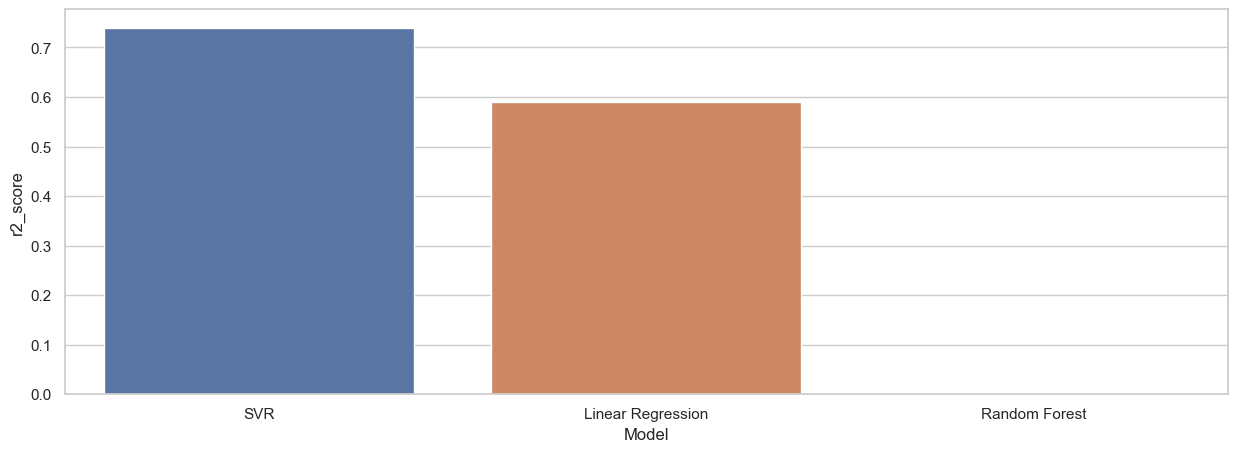

In [61]:
plt.figure(figsize=(15,5))
sns.set(style= 'whitegrid')
ax=sns.barplot(x='Model',y='r2_score',data=dfr)

#### SVR(support vector regressor) is the best model for comfirmed cases prediction

## Conclusion
**The US, India, Brazil, Russia, Colombia, Peru, Mexico, Spain, South Africa, and Argentina are the ten most affected countries.
and we forecasted that the number of cases in this country would rise in the future.**

## suggestions to the government health department of the country/region for preparation based on our  predictions.

**RecommendationsResource Allocation:Estimate the healthcare resources required (e.g., hospital beds, ventilators) based on the forecasted cases.Recommend stockpiling essential medical supplies and PPE.**

**Preventive Measures:Suggest policies for lockdowns, social distancing, and vaccination drives.Propose public health campaigns to raise awareness and ensure compliance with safety measures.**

**Capacity Building:Advise on increasing testing capacities and contact tracing efforts.Recommend training programs for healthcare workers.**

**Contingency Plans:Develop contingency plans for worst-case scenarios.Suggest collaborations with neighboring regions/countries for resource sharing.**